In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
from scipy.stats import boxcox 
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


# Importing dataset

In [119]:
url="https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv"

ds=pd.read_csv(url)
ds

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [120]:
df=pd.DataFrame(ds)

The Medical Cost Personal Insurance Project dataset contains 1338 individual and unique rows with 7 variable columns include 6 independent variable and 1 dependent variable target label as charges

In [121]:
df.head(15)

age     sex     bmi  children smoker     region      charges
0    19  female  27.900         0    yes  southwest  16884.92400
1    18    male  33.770         1     no  southeast   1725.55230
2    28    male  33.000         3     no  southeast   4449.46200
3    33    male  22.705         0     no  northwest  21984.47061
4    32    male  28.880         0     no  northwest   3866.85520
5    31  female  25.740         0     no  southeast   3756.62160
6    46  female  33.440         1     no  southeast   8240.58960
7    37  female  27.740         3     no  northwest   7281.50560
8    37    male  29.830         2     no  northeast   6406.41070
9    60  female  25.840         0     no  northwest  28923.13692
10   25    male  26.220         0     no  northeast   2721.32080
11   62  female  26.290         0    yes  southeast  27808.72510
12   23    male  34.400         0     no  southwest   1826.84300
13   56  female  39.820         0     no  southeast  11090.71780
14   27    male  42.130         0    yes  southeast  39611.75770

In [122]:
df.tail(30)

age     sex     bmi  children smoker     region      charges
1308   25  female  30.200         0    yes  southwest  33900.65300
1309   41    male  32.200         2     no  southwest   6875.96100
1310   42    male  26.315         1     no  northwest   6940.90985
1311   33  female  26.695         0     no  northwest   4571.41305
1312   34    male  42.900         1     no  southwest   4536.25900
1313   19  female  34.700         2    yes  southwest  36397.57600
1314   30  female  23.655         3    yes  northwest  18765.87545
1315   18    male  28.310         1     no  northeast  11272.33139
1316   19  female  20.600         0     no  southwest   1731.67700
1317   18    male  53.130         0     no  southeast   1163.46270
1318   35    male  39.710         4     no  northeast  19496.71917
1319   39  female  26.315         2     no  northwest   7201.70085
1320   31    male  31.065         3     no  northwest   5425.02335
1321   62    male  26.695         0    yes  northeast  28101.33305
1322   62    male  38.830         0     no  southeast  12981.34570
1323   42  female  40.370         2    yes  southeast  43896.37630
1324   31    male  25.935         1     no  northwest   4239.89265
1325   61    male  33.535         0     no  northeast  13143.33665
1326   42  female  32.870         0     no  northeast   7050.02130
1327   51    male  30.030         1     no  southeast   9377.90470
1328   23  female  24.225         2     no  northeast  22395.74424
1329   52    male  38.600         2     no  southwest  10325.20600
1330   57  female  25.740         2     no  southeast  12629.16560
1331   23  female  33.400         0     no  southwest  10795.93733
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

# Exploratory Data Analysis (EDA)

In [123]:
#checking the dimension of the dataset
df.shape

(1338, 7)

The dataset contains 1338 rows and 7 columns

In [124]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [125]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [126]:
#checking the datatypes of columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Here both numerical and categorical columns are present as (int64,object,float64) in dataset

# np.nan,None,NaN,others

In [127]:
#checking the null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [128]:
df.isnull().sum().sum()

0

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


This shows dataset include indexing range,column type,no null values,data type with counts,memory usage 

<Axes: >

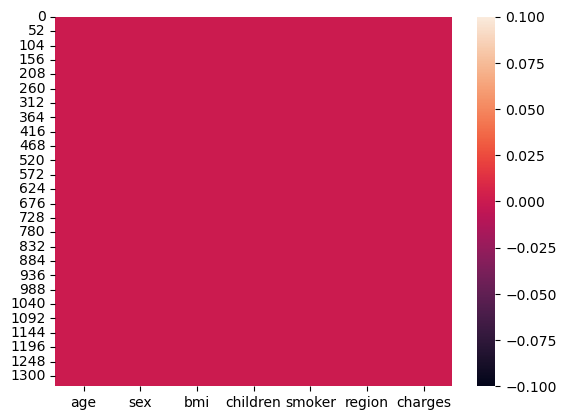

In [130]:
#lets visualize it using heatmap
sns.heatmap(df.isnull())

This map show that there is no null value present in the dataset

In [131]:
df["charges"].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [132]:
df["charges"].nunique()

1337

In [133]:
#checking the value count for each columns

for i in df.columns:
    print(df[i].value_counts())
    print("\n")
 

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [134]:
#checking number of unique values in x dataset
df.nunique().to_frame("No.of unique value")


No.of unique value
age                       47
sex                        2
bmi                      548
children                   6
smoker                     2
region                     4
charges                 1337

This table represent that sex,smoker,region,children has limited unique value compare to age,bmi,charges 

In [135]:
#checking the target column charges unique value
df["charges"].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [136]:
#checking the target column charges unique value count
df["charges"].nunique()

1337

From this we can observe that target label 'charges' has numerical data and all the unique value so that problem can be termed as regression so to predict the charges of medical expenses on the basis of independent variable using regression model

In [137]:
# Statistical summary of numerical columns 
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

This gives the statistical information of the numerical columns.
The summary of dataset looks perfect as it doesnot have any null value, negative, invalid values present 
1 The count of all the columns is same as it means there is no missing values 
2 The mean median value is approx. equal in BMI,age, children as this variable means data distribution is uniform 
3 Charges column mean>median represent right skewness 

# Feature Preprocessing

In [138]:
#Converting sex,smoker,region column from object datatype into numerical datatype
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

columns_to_encode = ["sex", "smoker", "region"]

# Apply LabelEncoder to each of the selected columns
for col in columns_to_encode:
    df[col] = LE.fit_transform(df[col])




df

age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [140]:
df.describe()

age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  
count  1338.000000   1338.000000  
mean      1.515695  13270.422265  
std       1.104885  12110.011237  
min       0.000000   1121.873900  
25%       1.000000   4740.287150  
50%       2.000000   9382.033000  
75%       2.000000  16639.912515  
max       3.000000  63770.428010

# Data Visualization/ Feature Engineering

# Univariate Analysis

1    676
0    662
Name: sex, dtype: int64


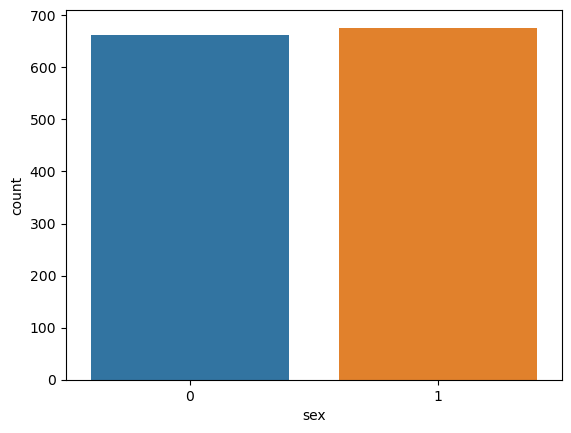

In [141]:
#Visualize the number of label target as quality

sns.countplot(x='sex',data=df)
print(df["sex"].value_counts())

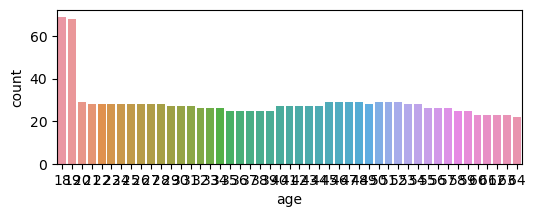

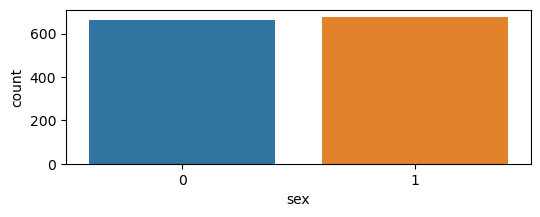

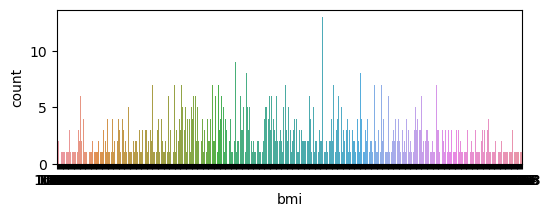

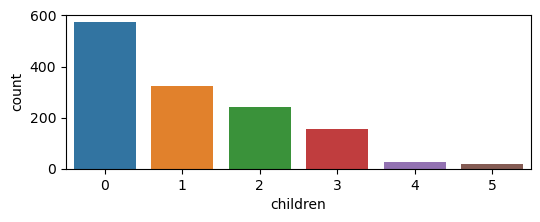

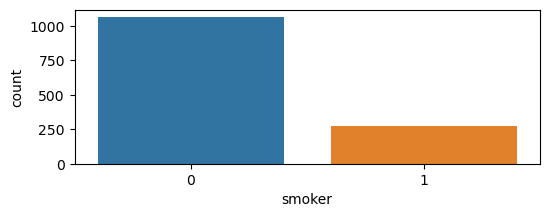

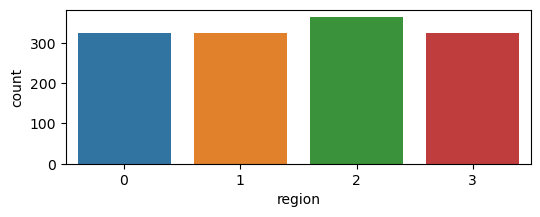

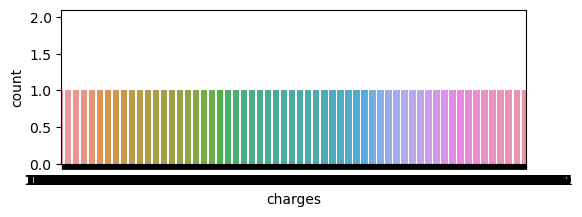

In [142]:
for i in df.columns:
    plt.figure(figsize=(6,2),facecolor="white")
    sns.countplot(x=df[i],data=df)
plt.show()

from the count plot we can understand variable like sex are approx equally distributed  all th region are equally distributed and also found biasness in children whrere 0,1,2 are high in count compare to 3,4,5 in dataset,smoker column data is also unequal , data of young people is also high compare data

# Checking the distribution of the data by using distplot

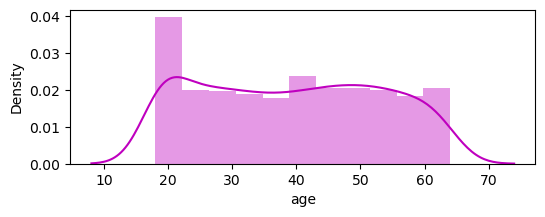

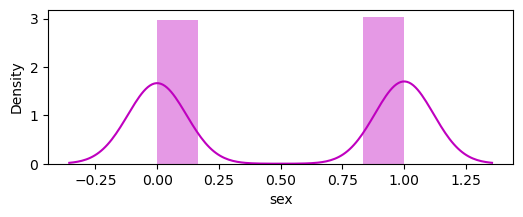

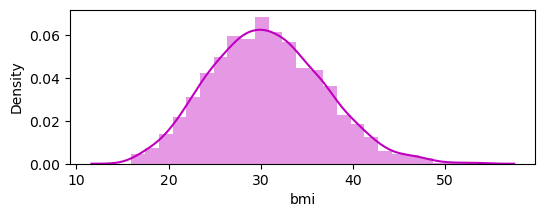

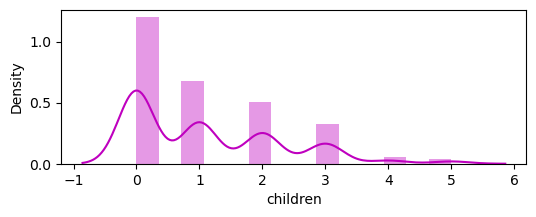

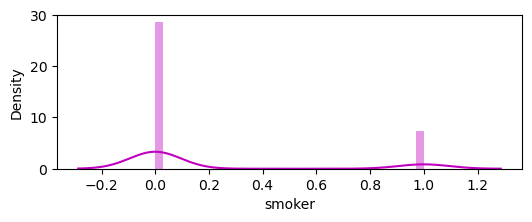

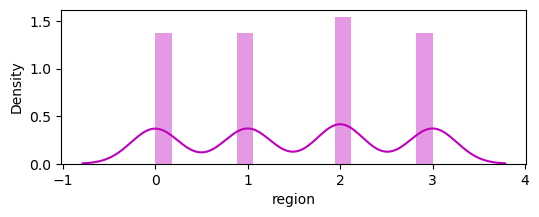

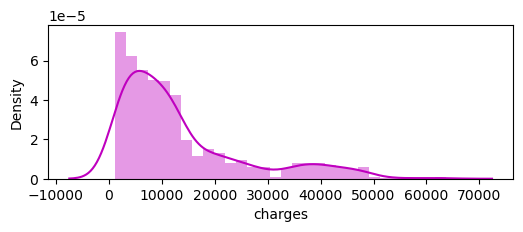

In [143]:
#Checking the distribution of the data of numerical column  by using distplot

for i in df.columns:
    plt.figure(figsize=(6,2),facecolor="white")
    sns.distplot(df[i],color="m")

Distribution of numerical data can be seen using distplot and almost all the numerical column data is equally distributed except for smoker,children

# Bivariate Analysis

<Figure size 600x200 with 0 Axes>

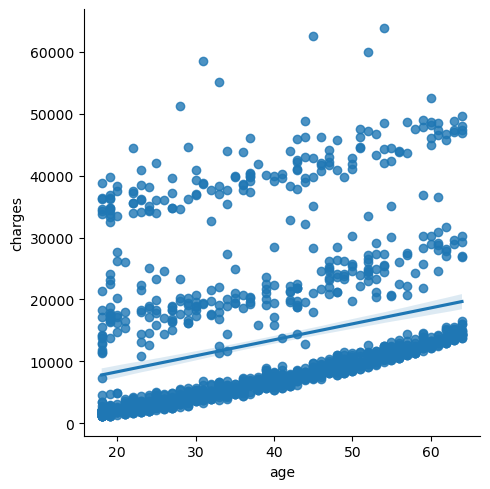

<Figure size 600x200 with 0 Axes>

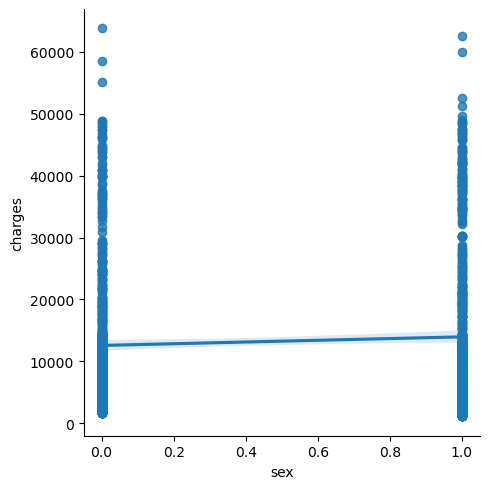

<Figure size 600x200 with 0 Axes>

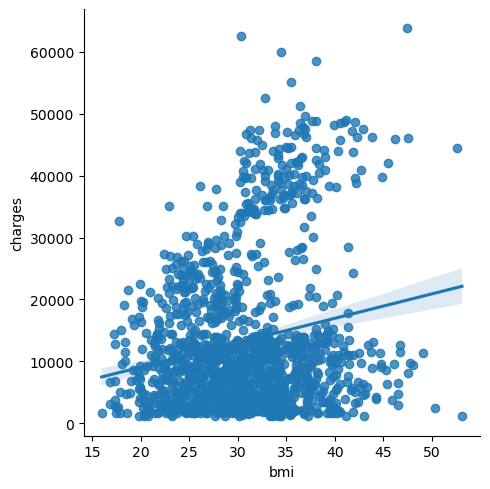

<Figure size 600x200 with 0 Axes>

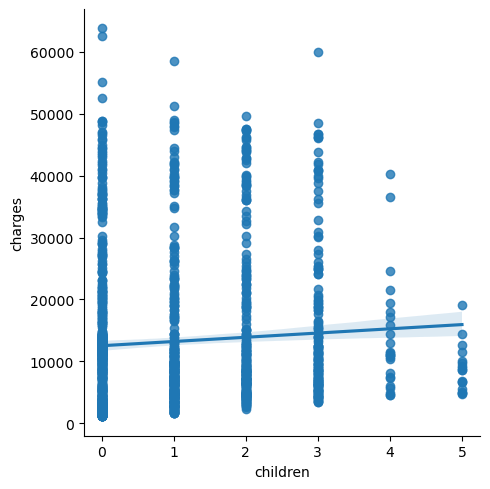

<Figure size 600x200 with 0 Axes>

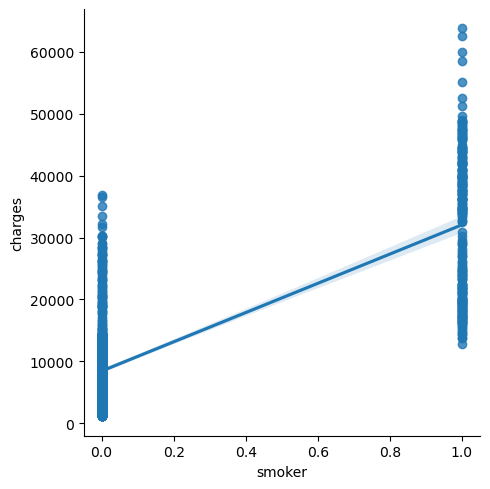

<Figure size 600x200 with 0 Axes>

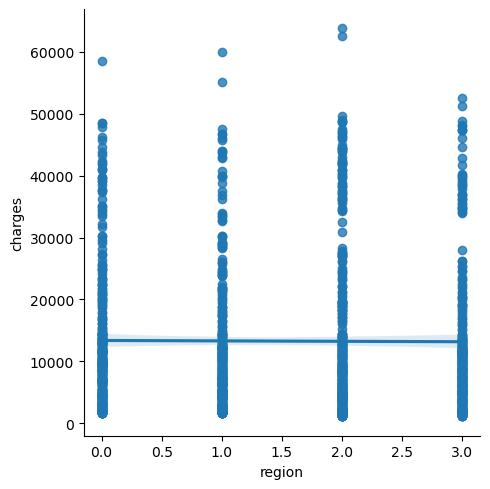

<Figure size 600x200 with 0 Axes>

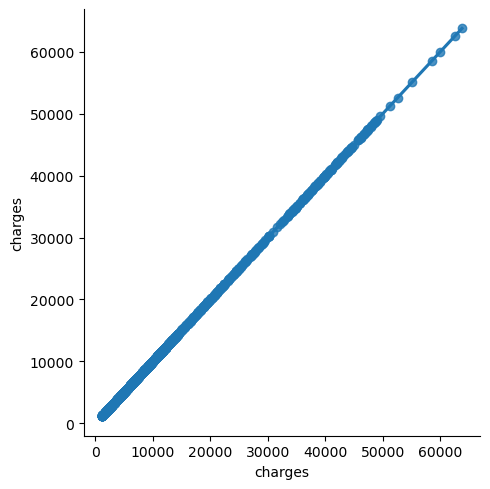

In [151]:
for i in  df.columns:
    plt.figure(figsize=(4,2),facecolor="white")
    sns.lmplot(x=i ,y="charges", data=df, palette="colorblind")
    plt.xlabel(i)
    plt.ylabel("charges")
    plt.show()

Ploting target variable churn with all the independent variable using lm plot

<Figure size 600x300 with 0 Axes>

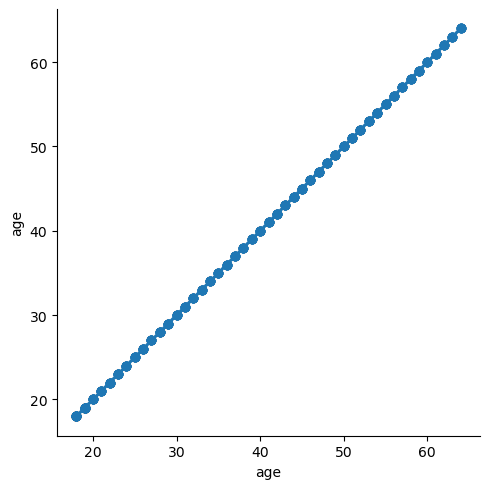

<Figure size 600x300 with 0 Axes>

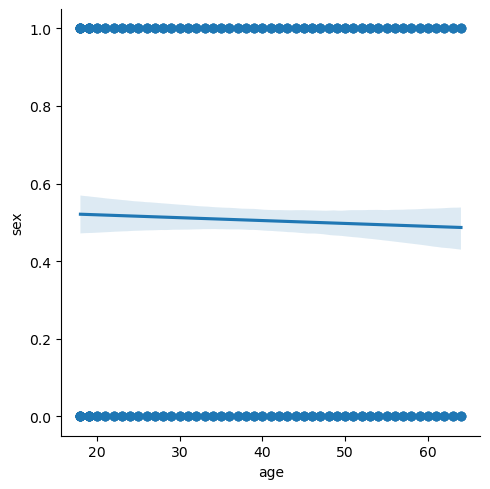

<Figure size 600x300 with 0 Axes>

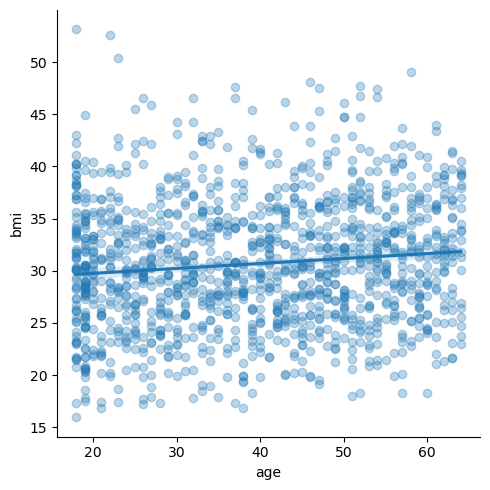

<Figure size 600x300 with 0 Axes>

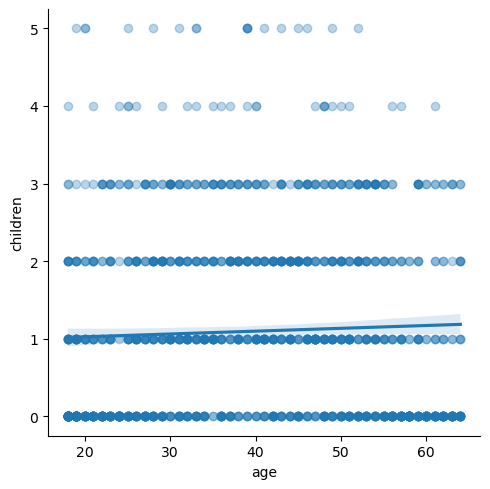

<Figure size 600x300 with 0 Axes>

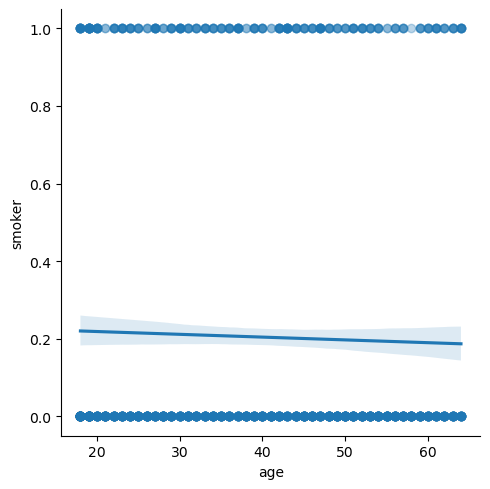

<Figure size 600x300 with 0 Axes>

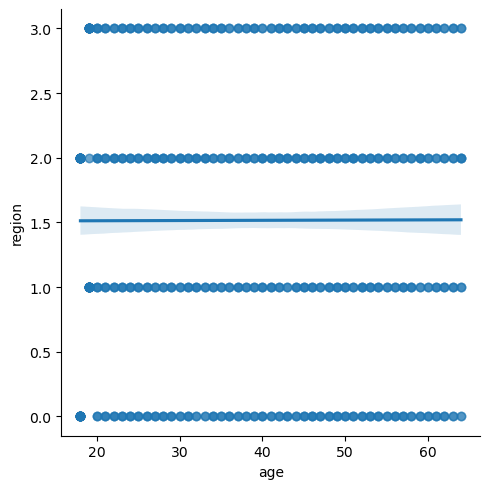

<Figure size 600x300 with 0 Axes>

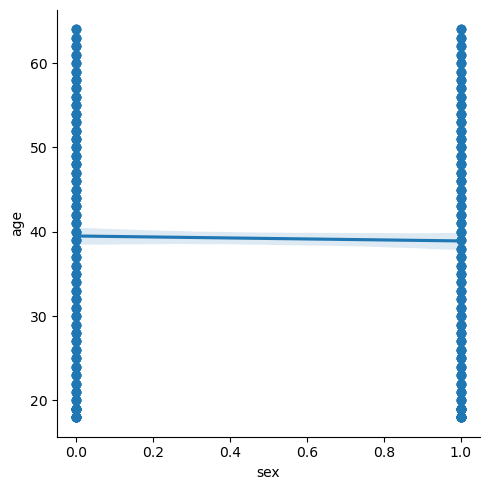

<Figure size 600x300 with 0 Axes>

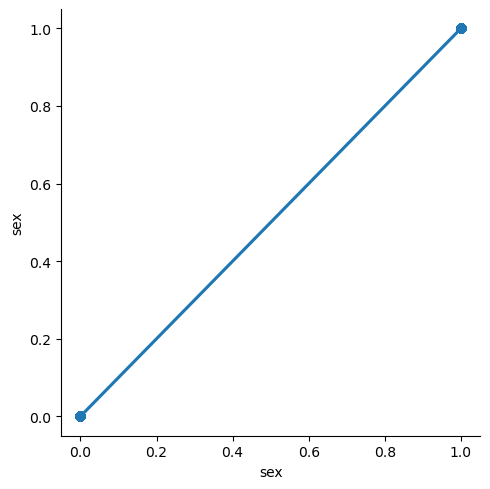

<Figure size 600x300 with 0 Axes>

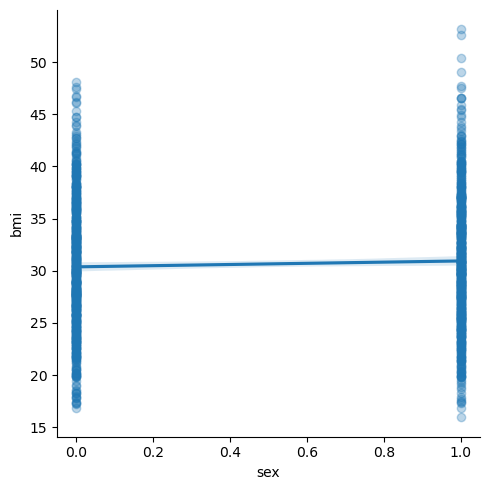

<Figure size 600x300 with 0 Axes>

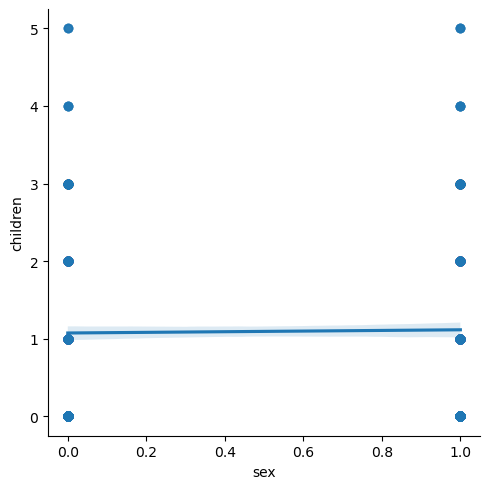

<Figure size 600x300 with 0 Axes>

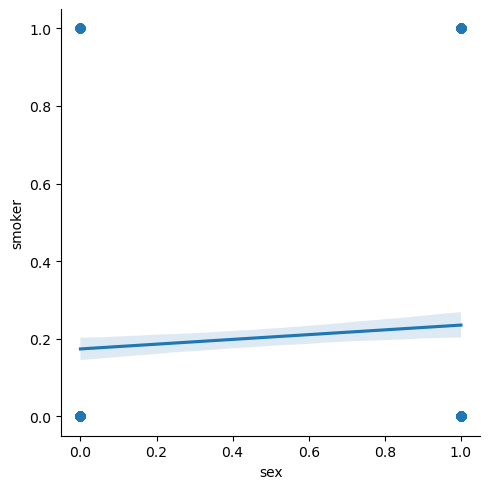

<Figure size 600x300 with 0 Axes>

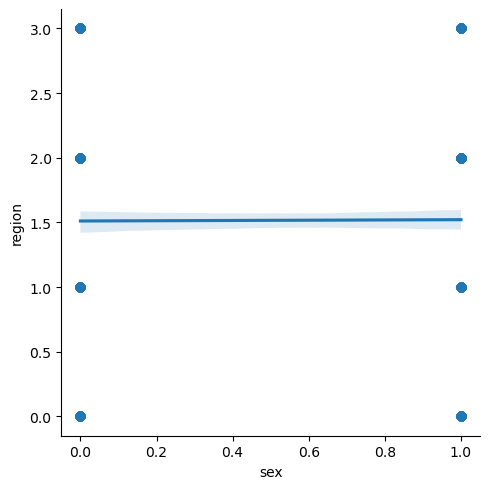

<Figure size 600x300 with 0 Axes>

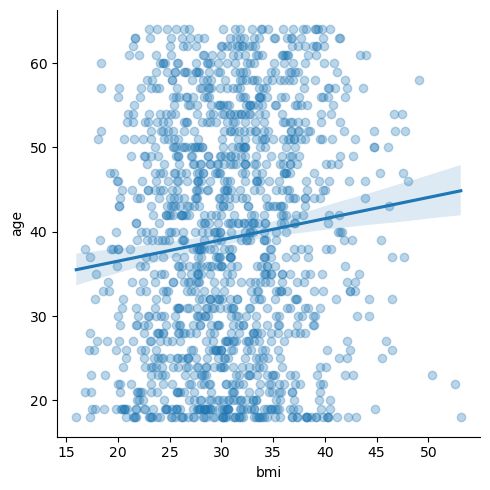

<Figure size 600x300 with 0 Axes>

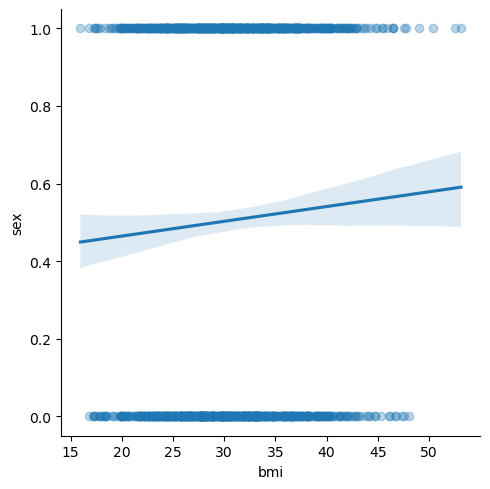

<Figure size 600x300 with 0 Axes>

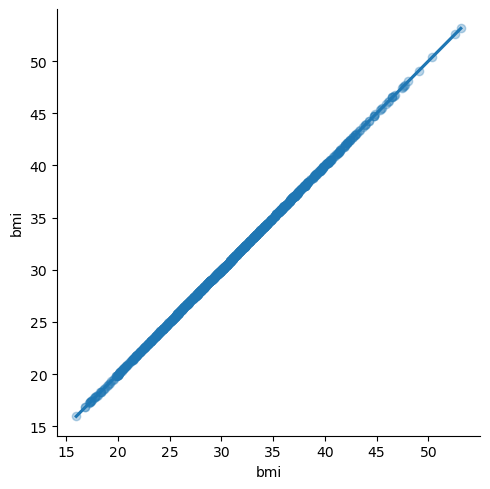

<Figure size 600x300 with 0 Axes>

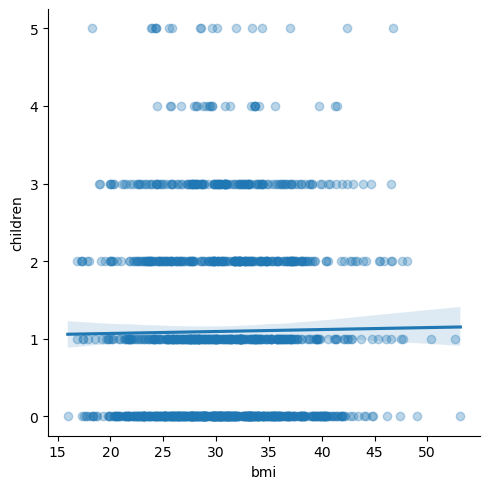

<Figure size 600x300 with 0 Axes>

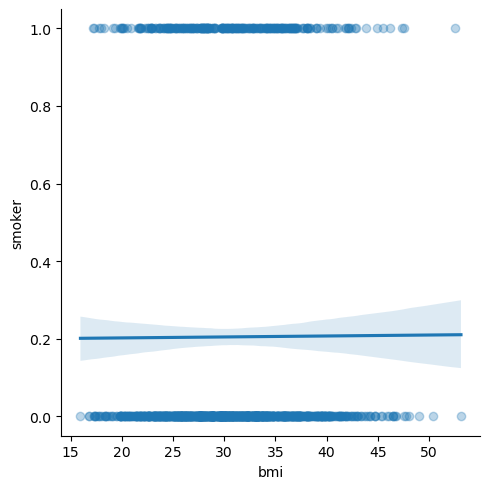

<Figure size 600x300 with 0 Axes>

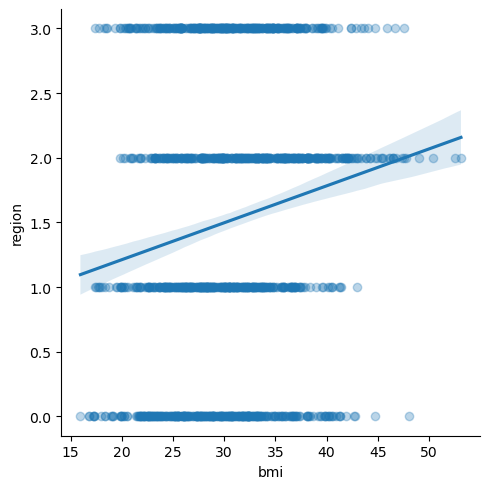

<Figure size 600x300 with 0 Axes>

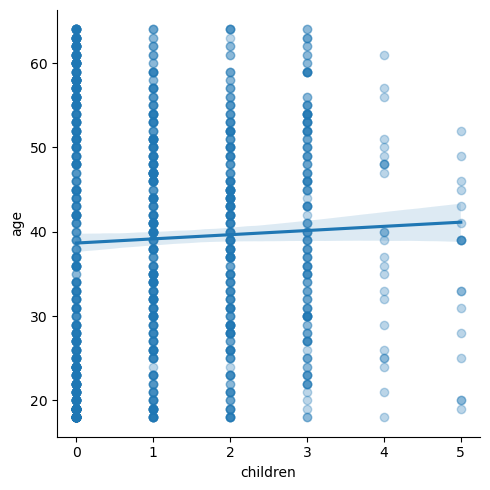

<Figure size 600x300 with 0 Axes>

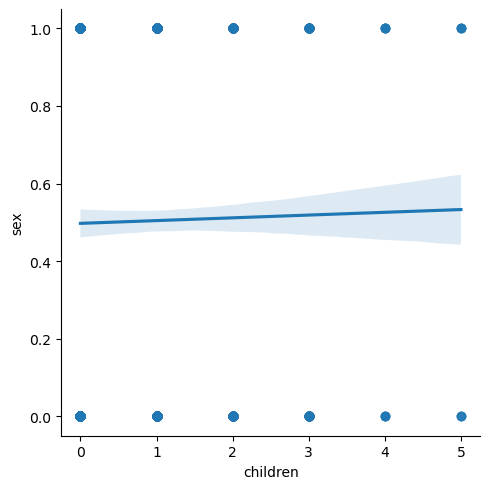

<Figure size 600x300 with 0 Axes>

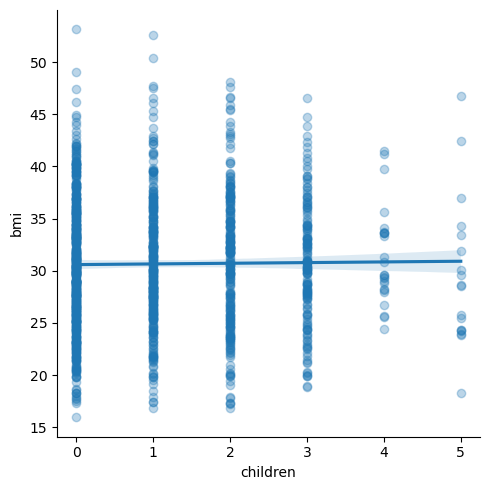

<Figure size 600x300 with 0 Axes>

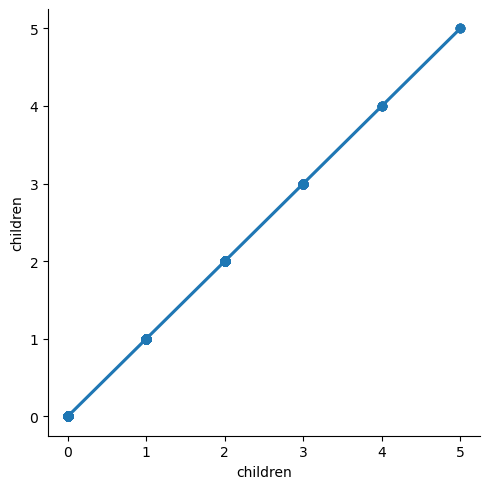

<Figure size 600x300 with 0 Axes>

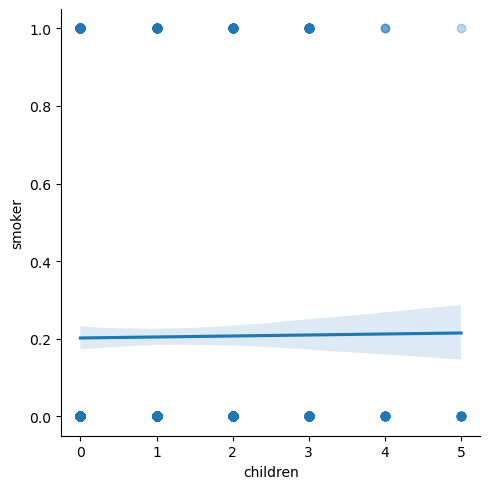

<Figure size 600x300 with 0 Axes>

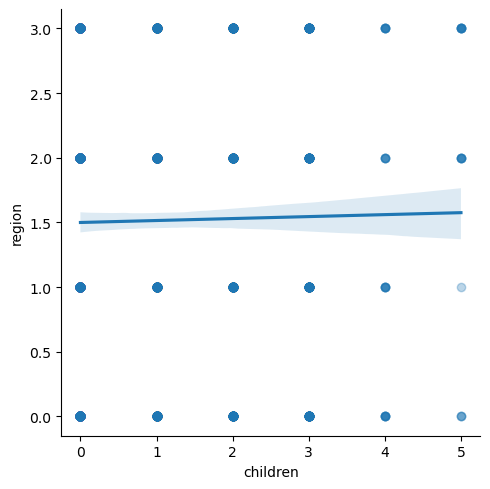

<Figure size 600x300 with 0 Axes>

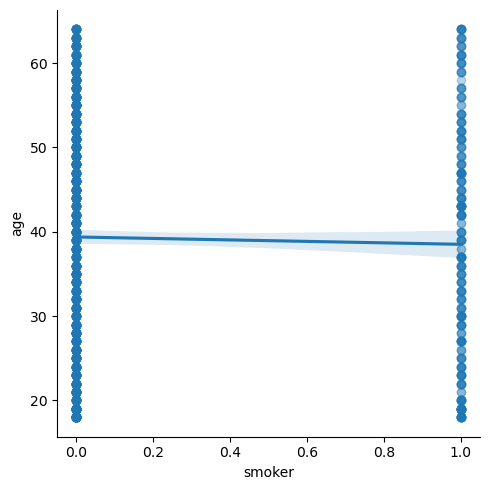

<Figure size 600x300 with 0 Axes>

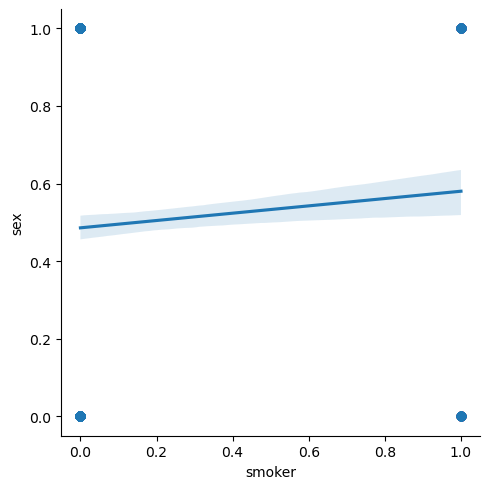

<Figure size 600x300 with 0 Axes>

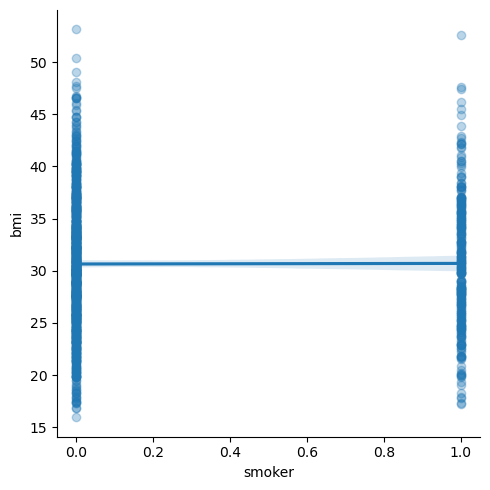

<Figure size 600x300 with 0 Axes>

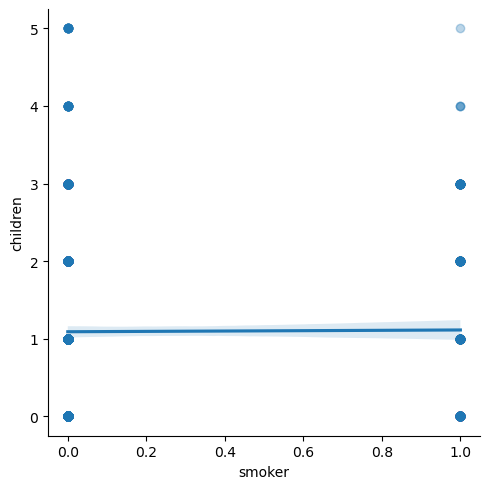

<Figure size 600x300 with 0 Axes>

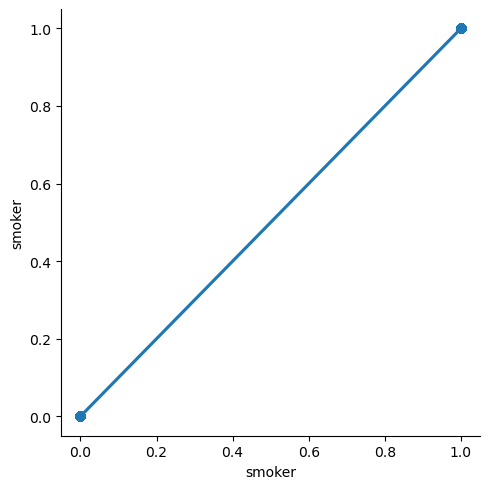

<Figure size 600x300 with 0 Axes>

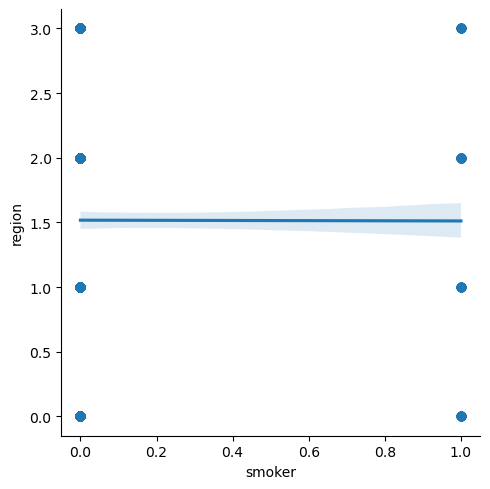

<Figure size 600x300 with 0 Axes>

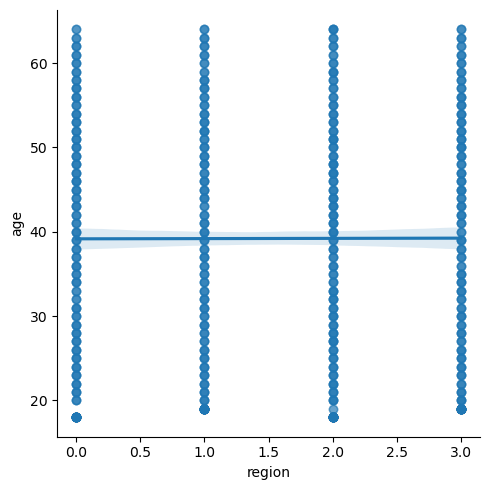

<Figure size 600x300 with 0 Axes>

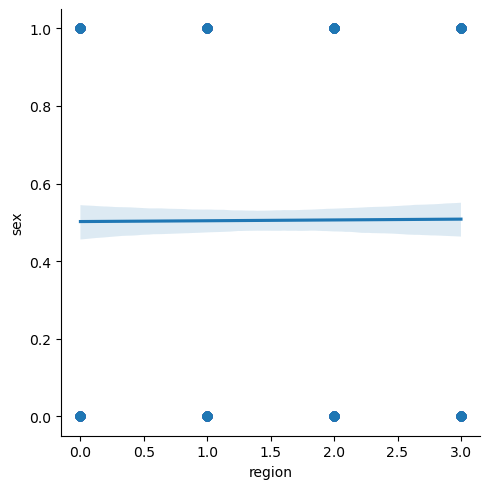

<Figure size 600x300 with 0 Axes>

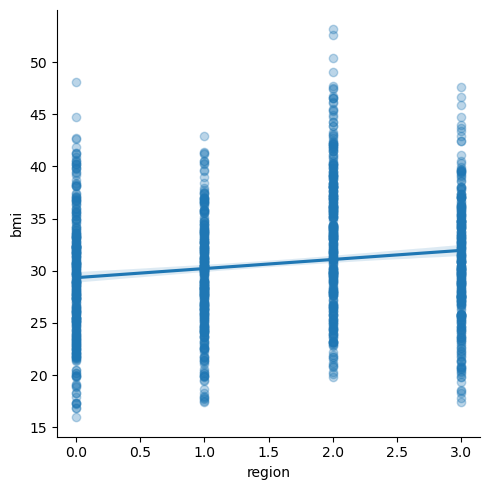

<Figure size 600x300 with 0 Axes>

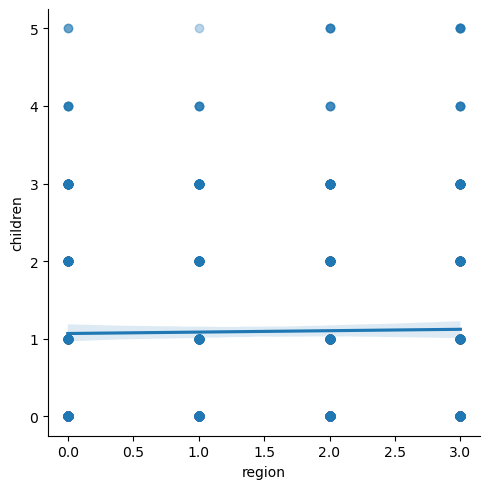

<Figure size 600x300 with 0 Axes>

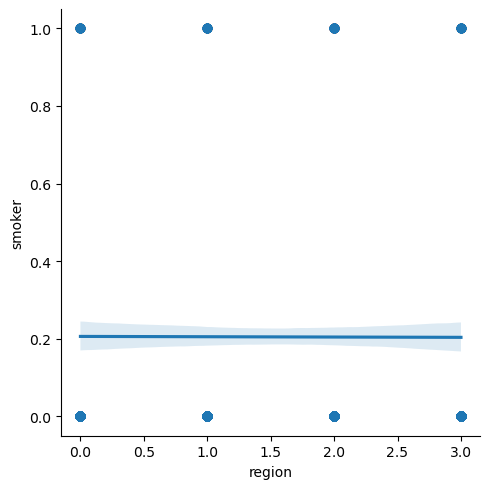

<Figure size 600x300 with 0 Axes>

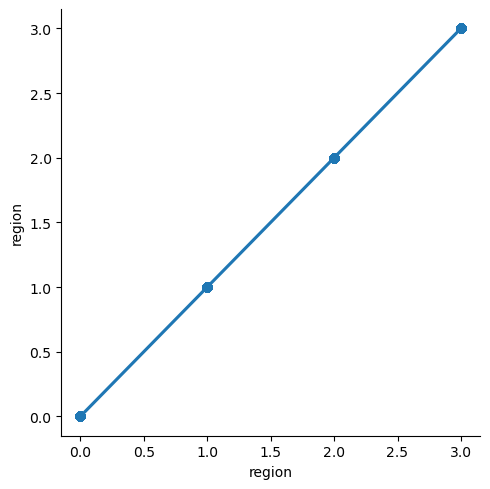

KeyError: "['charges'] not in index"

<Figure size 600x300 with 0 Axes>

In [160]:
c=["age","sex","bmi","children","smoker","region"]

for feature in df.columns:
    for column in c:
        plt.figure(figsize=(4,3),facecolor="white")
        sns.lmplot(x=feature, y=column, data=df.iloc[:,:-1], palette="colorblind", scatter_kws={'alpha':0.3})
        plt.xlabel(feature)
        plt.ylabel(column)
        plt.show()  # Show the plot for each feature

Plotting all the independent variable with each other using lm plot as showing no relationship with each other using lmplot lets explore further to find all any relationship using different plot

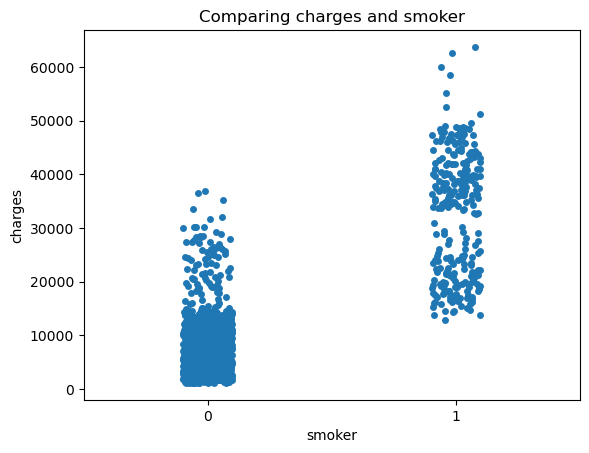

In [153]:
#comparing smoker and charges
plt.title("Comparing charges and smoker")
sns.stripplot(x='smoker', y='charges',data =df)
plt.show()

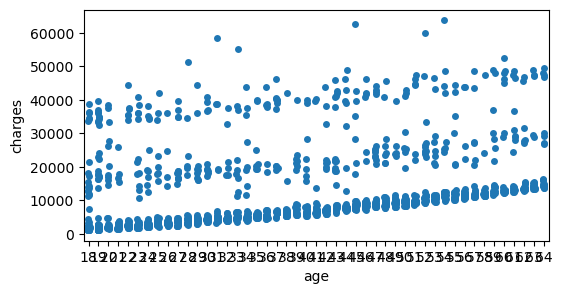

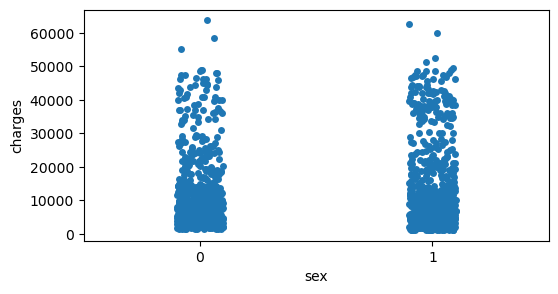

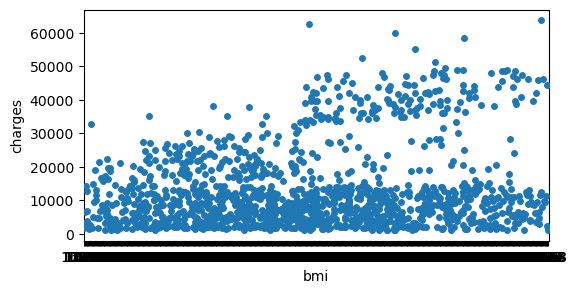

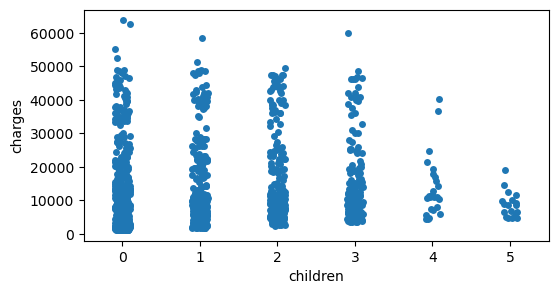

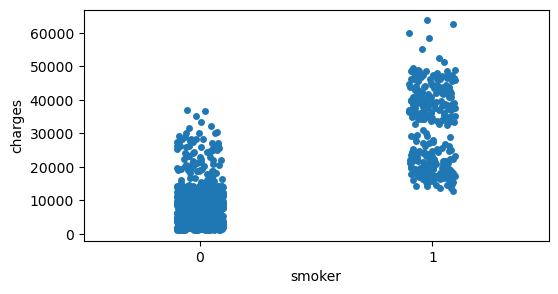

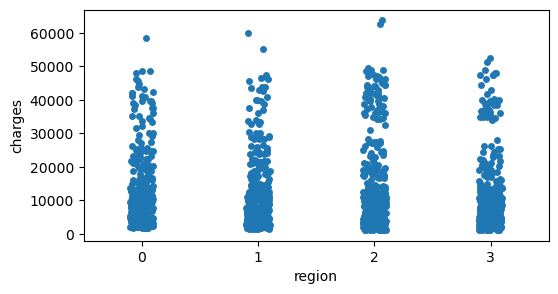

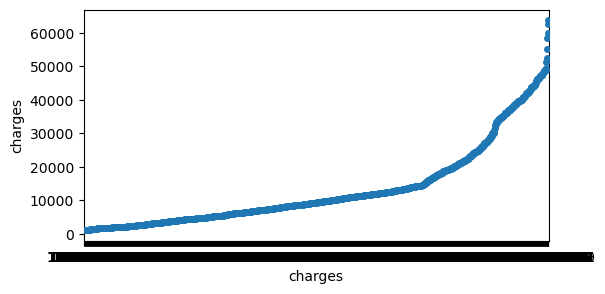

In [158]:
for i in df.columns:
    plt.figure(figsize=(6,3),facecolor="white")
    sns.stripplot(x=i,y="charges",data =df)
    plt.xlabel(i)
    plt.ylabel("charges")
    plt.show()

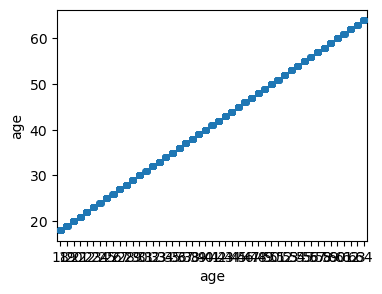

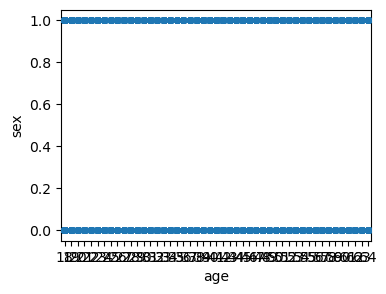

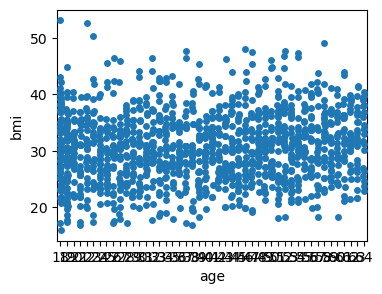

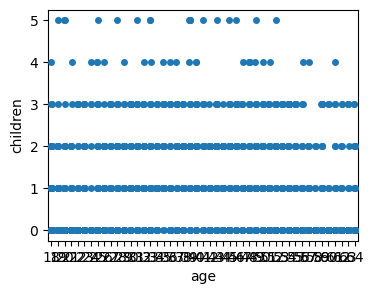

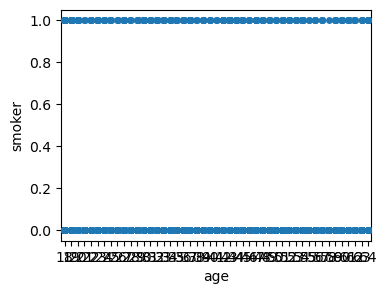

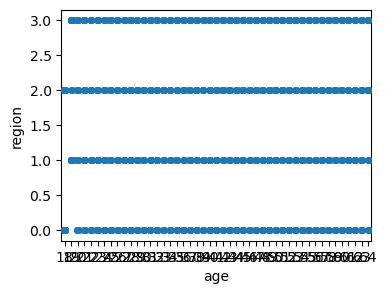

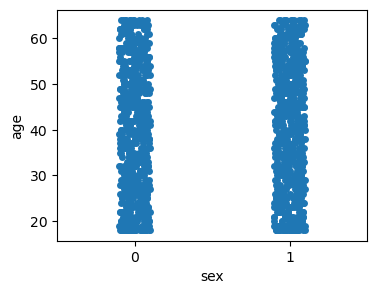

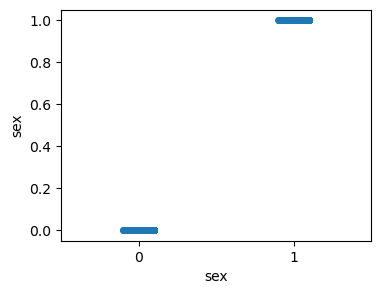

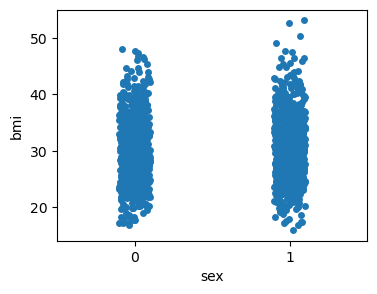

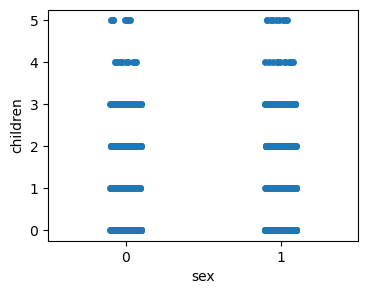

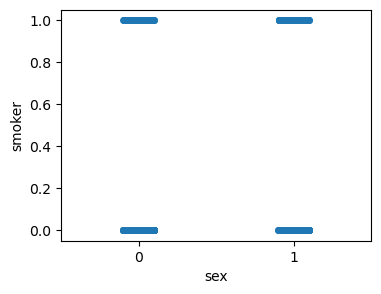

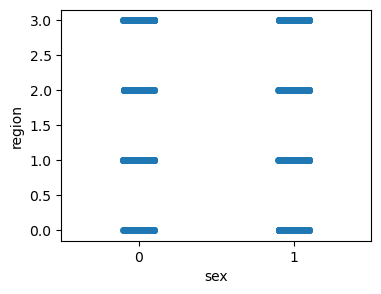

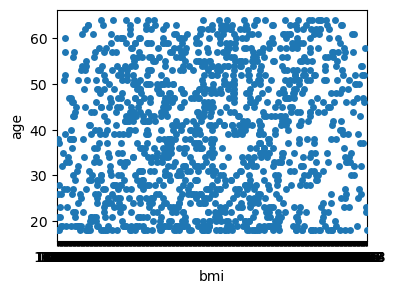

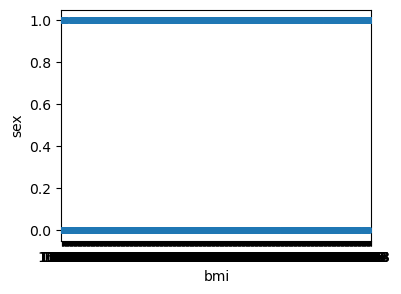

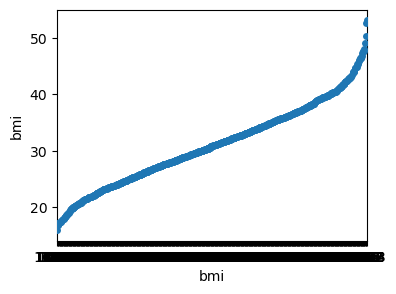

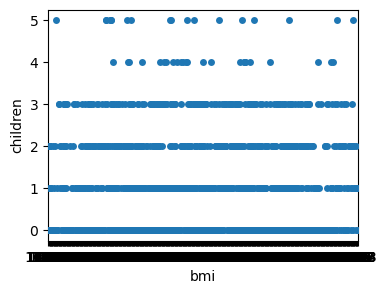

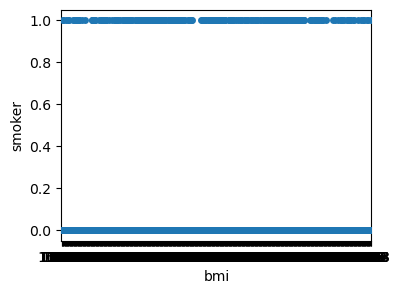

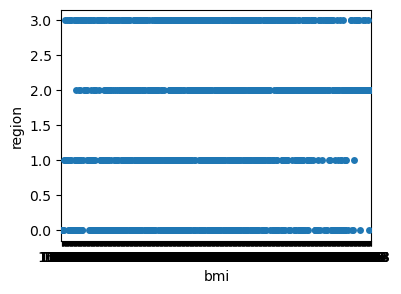

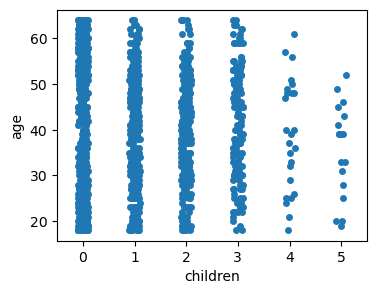

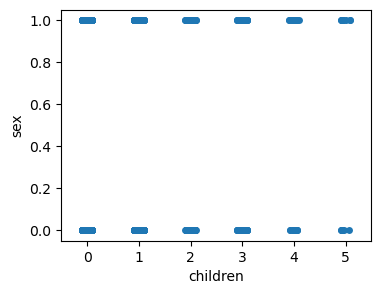

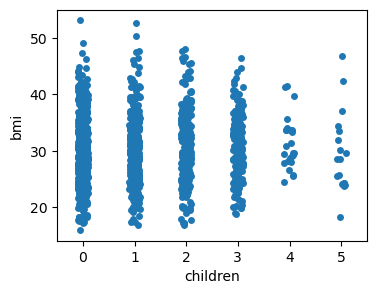

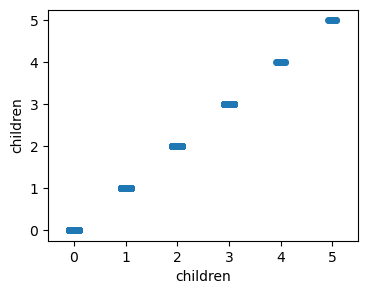

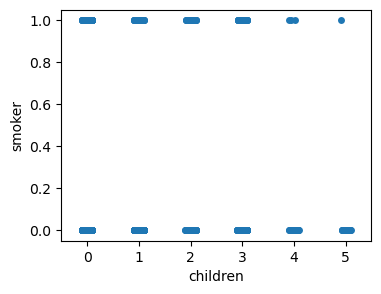

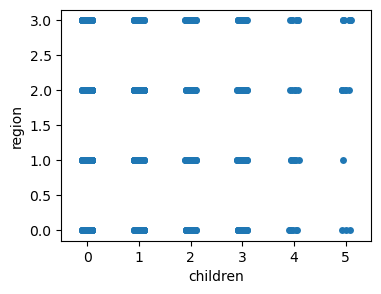

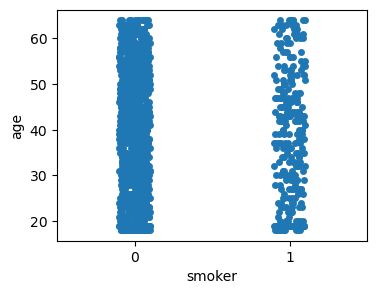

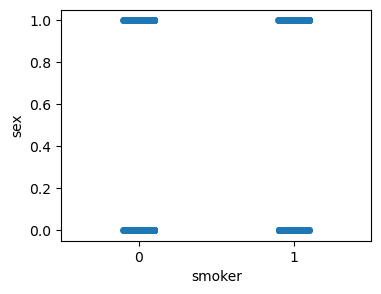

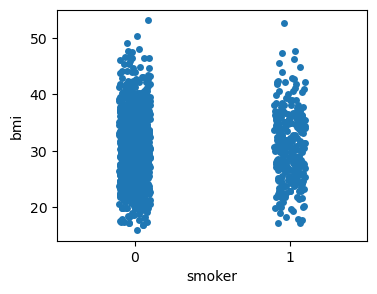

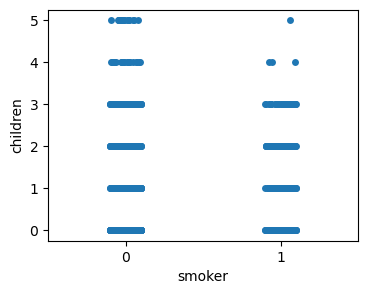

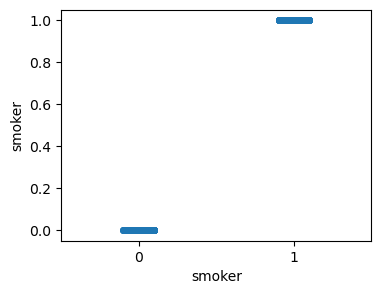

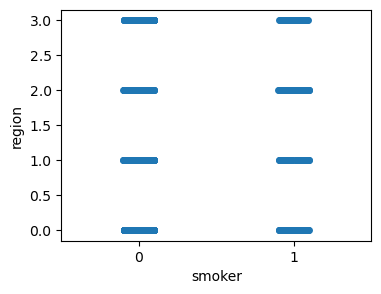

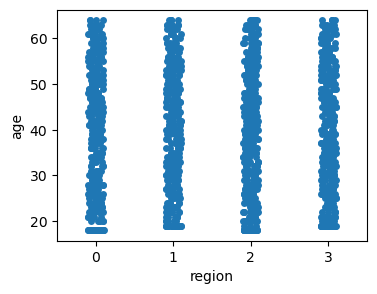

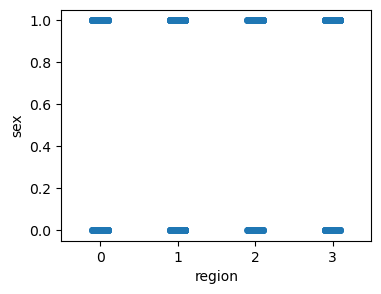

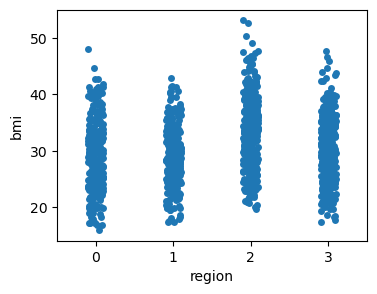

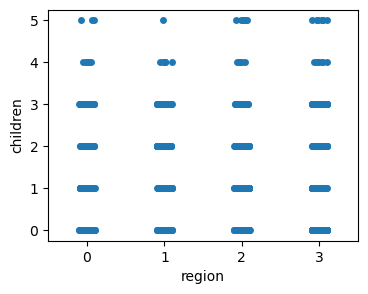

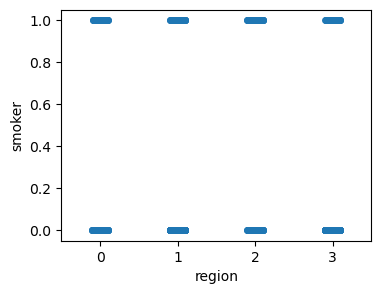

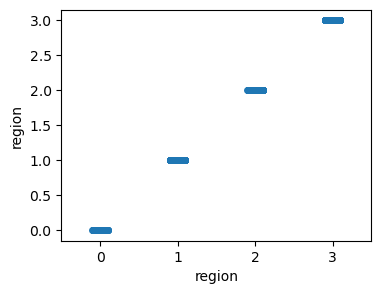

ValueError: Could not interpret value `charges` for parameter `x`

<Figure size 400x300 with 0 Axes>

In [161]:
c=["age","sex","bmi","children","smoker","region"]

for feature in df.columns:
    for column in c:
        plt.figure(figsize=(4,3),facecolor="white")
        sns.stripplot(x=feature, y=column, data=df.iloc[:,:-1])
        plt.xlabel(feature)
        plt.ylabel(column)
        plt.show()  # Show the plot for each feature

This figure show those who smoke has high charges compare to those who not smoke

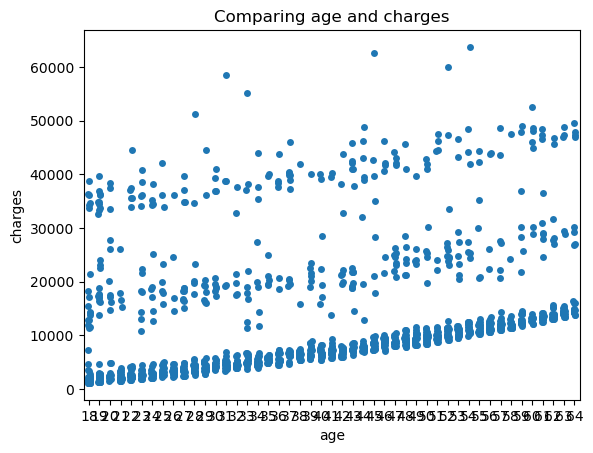

In [154]:
#comparing age and charges
plt.title("Comparing age and charges")
sns.stripplot(x='age', y='charges',data =df)
plt.show()

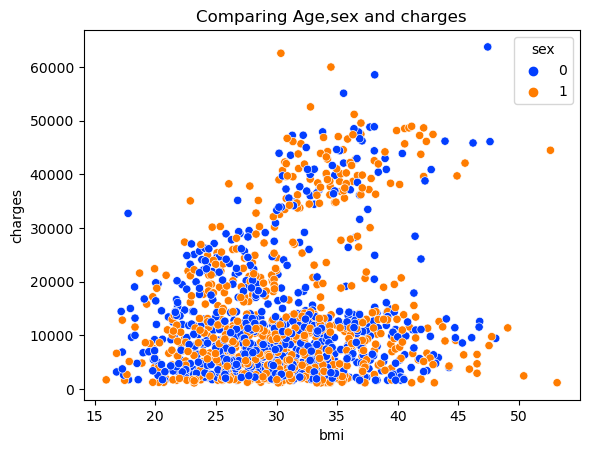

In [162]:
#Comparing bmi charges and sex
plt.title("Comparing Age,sex and charges")
sns.scatterplot(x="bmi",y="charges",data=df,hue="sex",palette="bright")
plt.show()

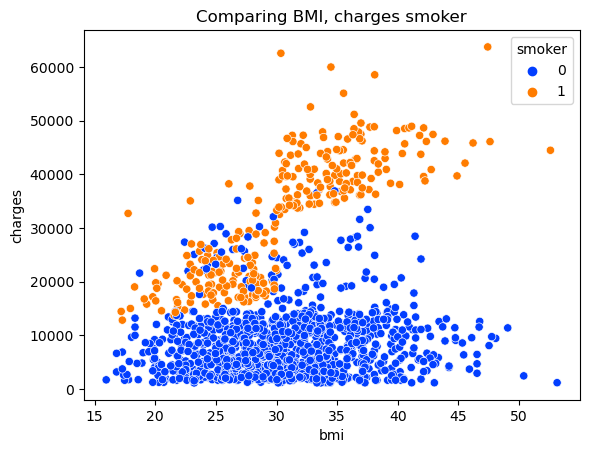

In [163]:
#Comparing BMI, charges smoker
plt.title("Comparing BMI, charges smoker")
sns.scatterplot(x="bmi",y="charges",data=df,hue="smoker",palette="bright")
plt.show()

No smoker has low charges with increase BMI as we evaluate  that increase in bmi with no smokker has no effect on charges where person who smoke with increase in BMI have high charges

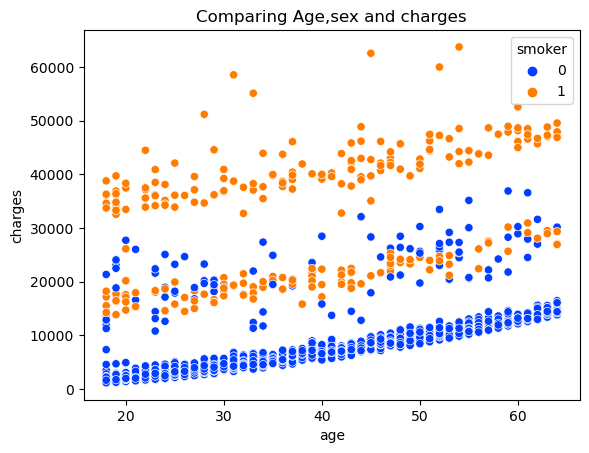

In [164]:
#Comparing Age,sex and charges
plt.title("Comparing Age,sex and charges")
sns.scatterplot(x="age",y="charges",data=df,hue="smoker",palette="bright")
plt.show()

Charges increase with smoker and  age 

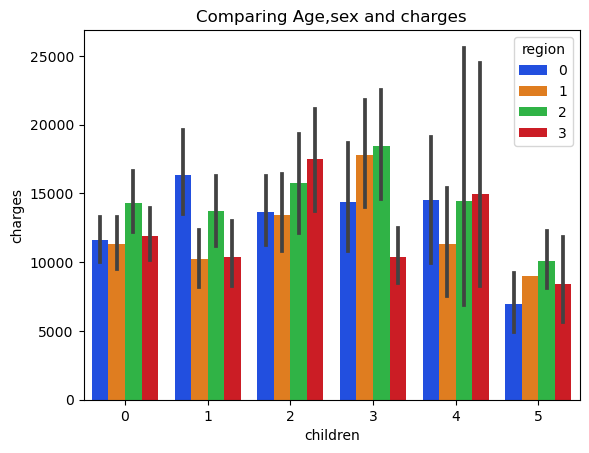

In [165]:
#Comparing children charges and region
plt.title("Comparing Age,sex and charges")
sns.barplot(x="children",y="charges",data=df,hue="region",palette="bright")
plt.show()

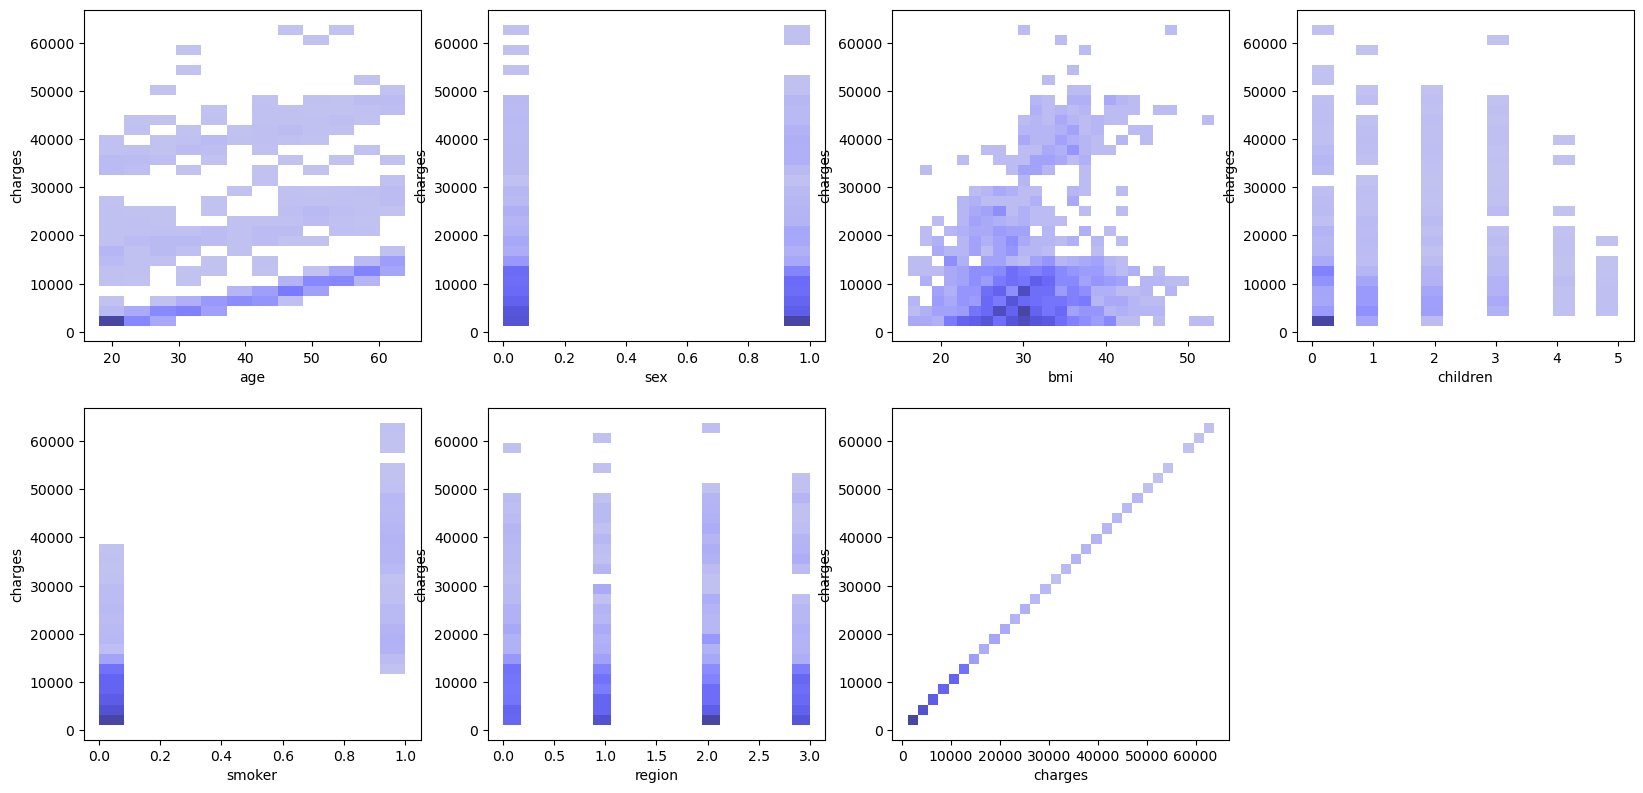

In [166]:
#Comparing charges with other columns using histplot plot to find any relationship 
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=7:
        plt.subplot(5,4,p)
        sns.histplot(x=i,y="charges", data =df,color='b')
        plt.xlabel(i)
        plt.ylabel("charges")
    p+=1
plt.show()

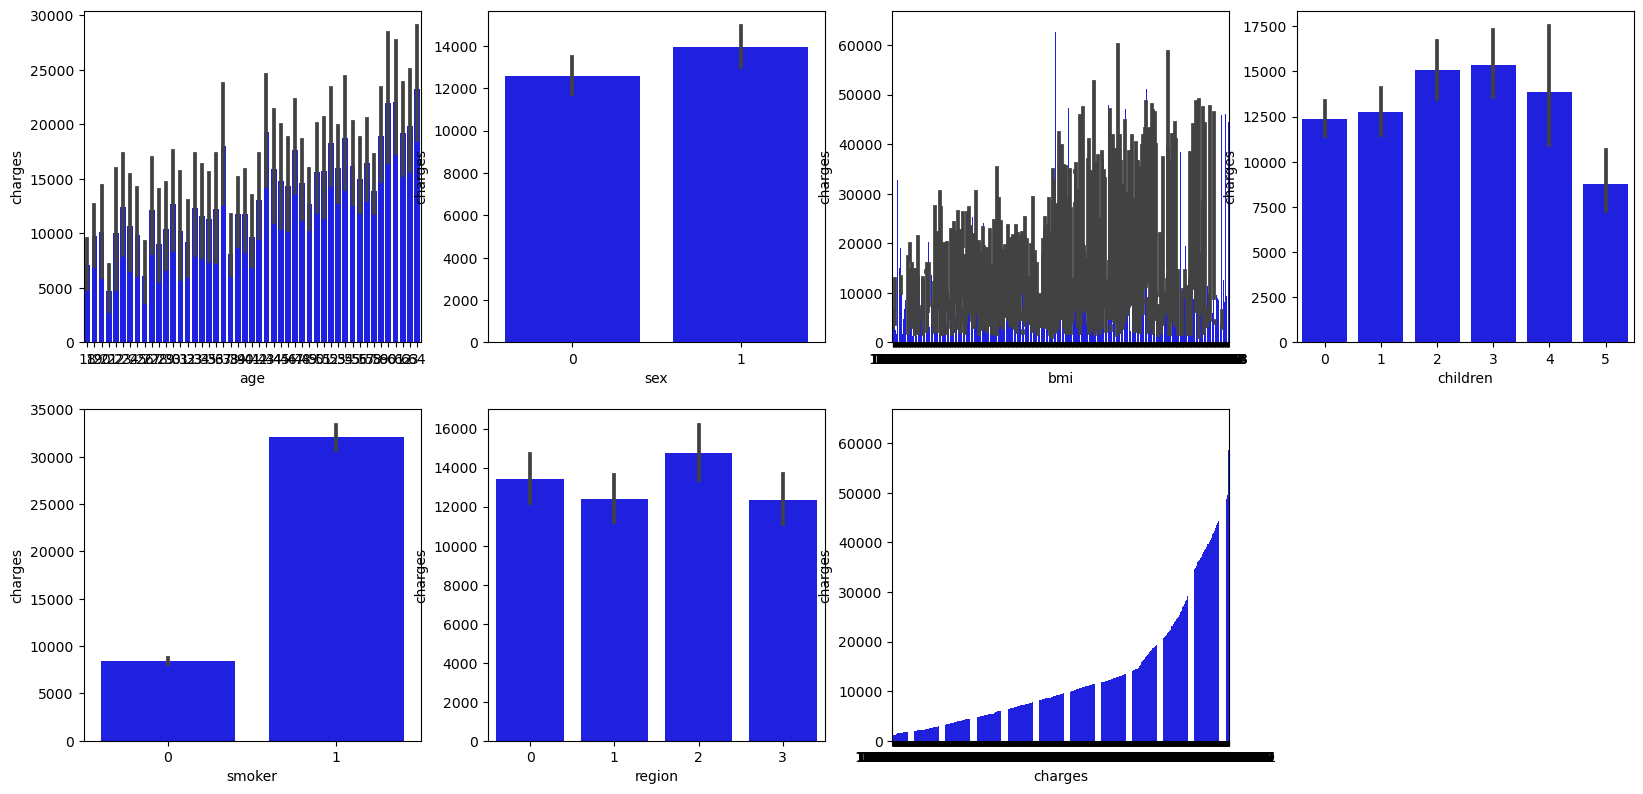

In [167]:
#Comparing charges with other columns using barplot plot to find any relationship 
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=7:
        plt.subplot(5,4,p)
        sns.barplot(x=i,y="charges", data =df,color='b')
        plt.xlabel(i)
        plt.ylabel("charges")
    p+=1
plt.show()

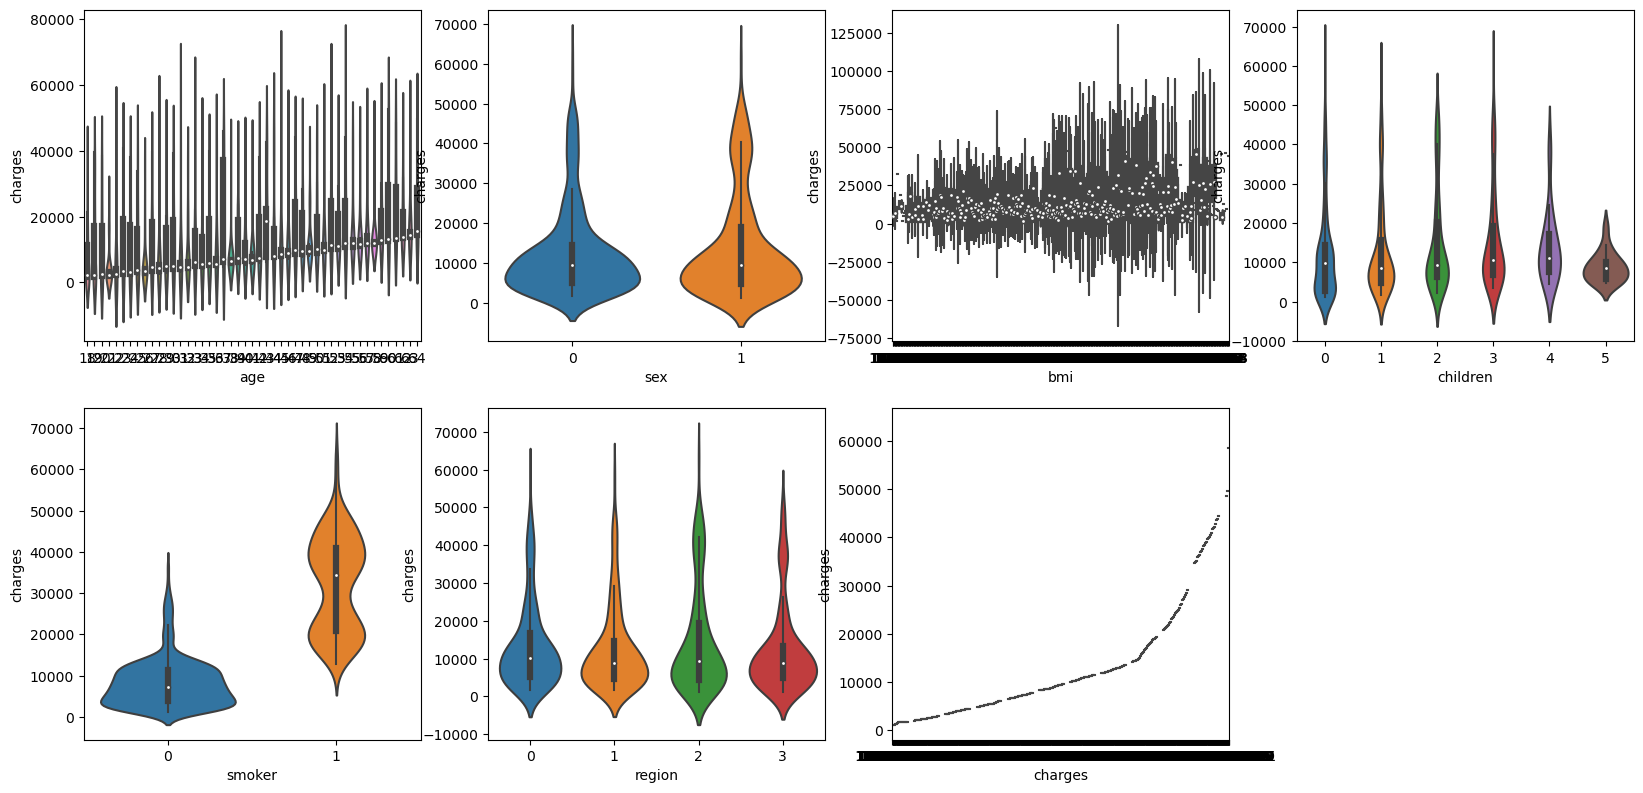

In [168]:
#Comparing charges with other columns using Violin plot to find any relationship 
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=7:
        plt.subplot(5,4,p)
        sns.violinplot(x=i,y="charges", data =df)
        plt.xlabel(i)
        plt.ylabel("charges")
    p+=1
plt.show()

From this plot we can observe that  charges increases with smoker 

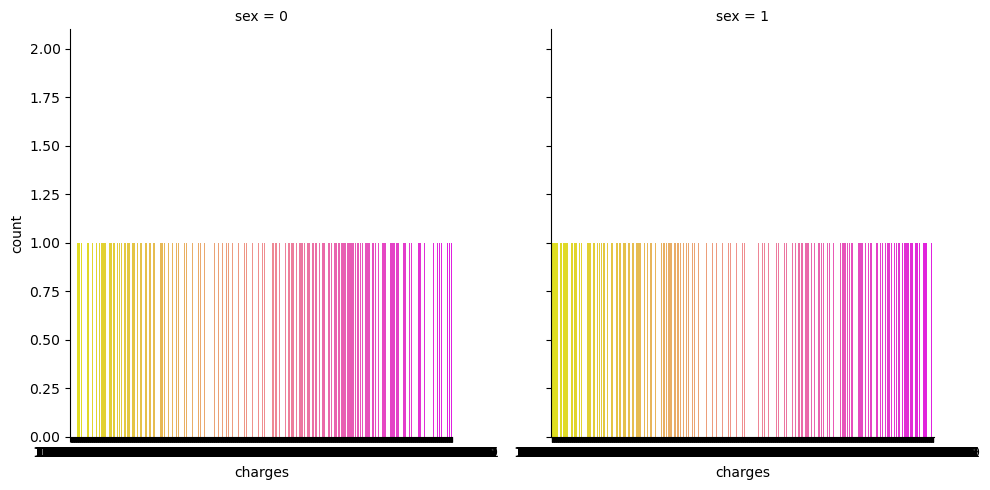

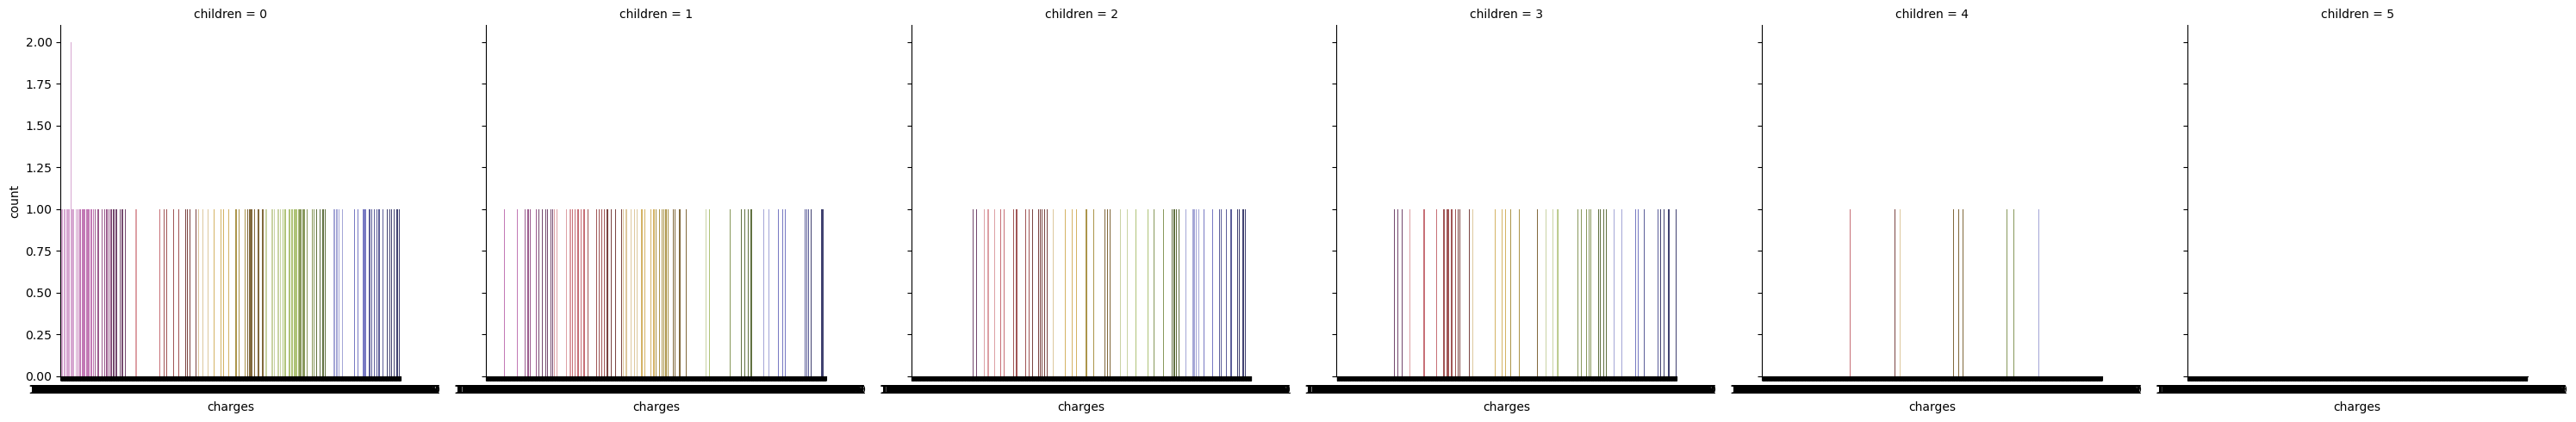

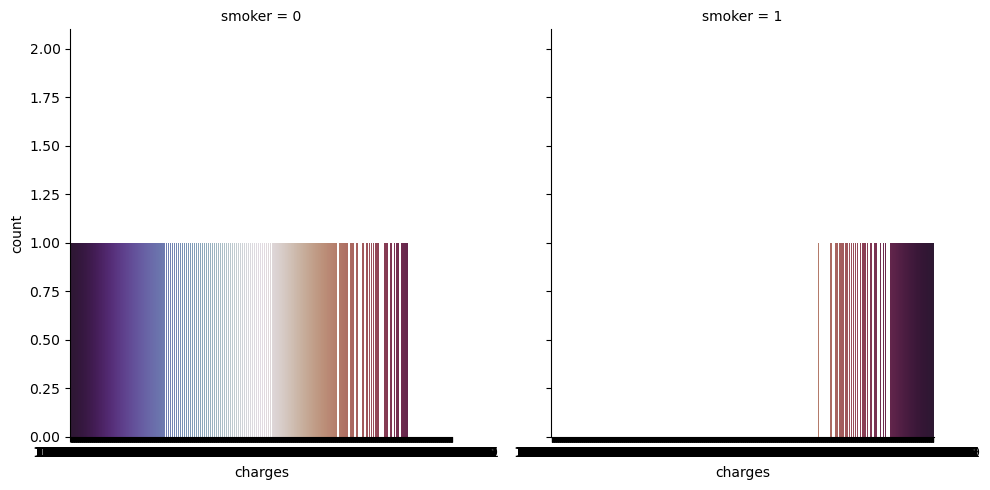

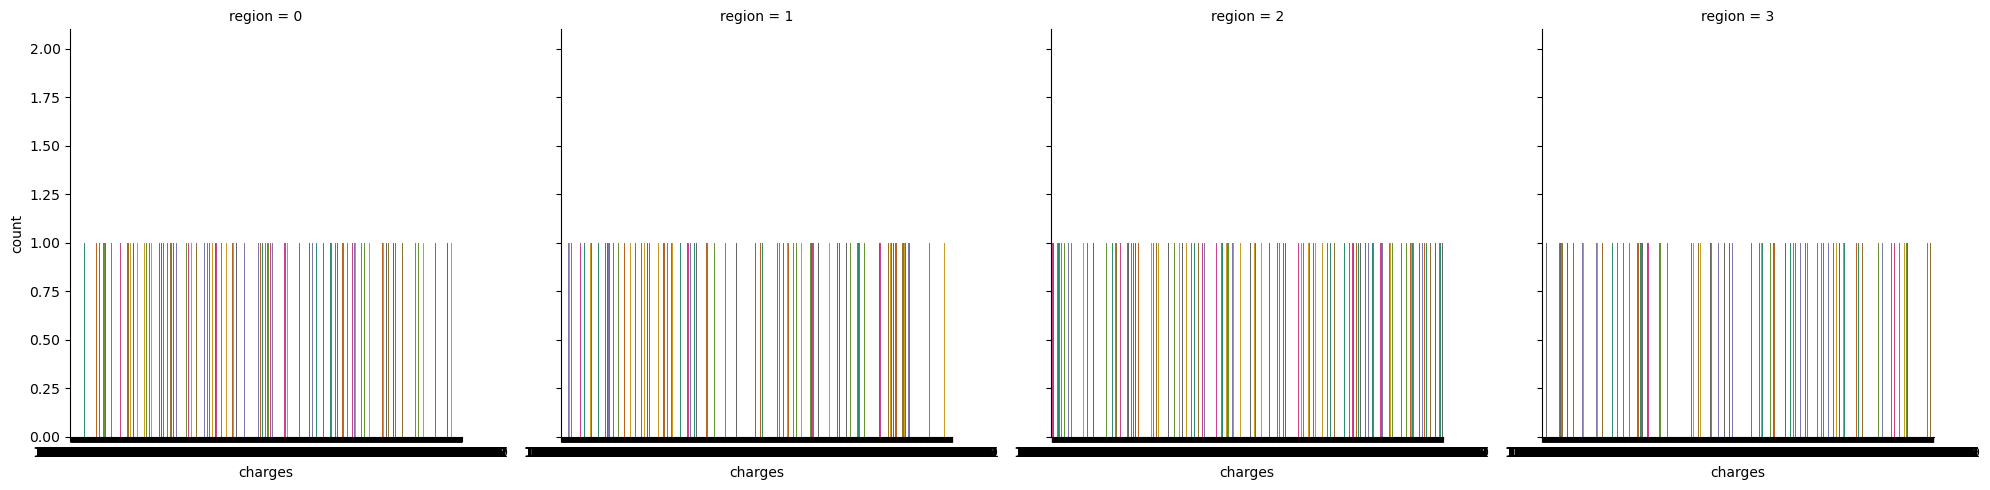

In [170]:
#Checking the charges level with sex, children,smoker,region

sns.catplot(x="charges",col="sex",data =df, kind="count",palette="spring_r")

sns.catplot(x="charges",col="children",data =df, kind="count",palette="tab20b_r")

sns.catplot(x="charges",col="smoker",data =df, kind="count",palette="twilight_shifted")


sns.catplot(x="charges",col="region",data =df, kind="count",palette="Dark2")

# Multivariate analyis

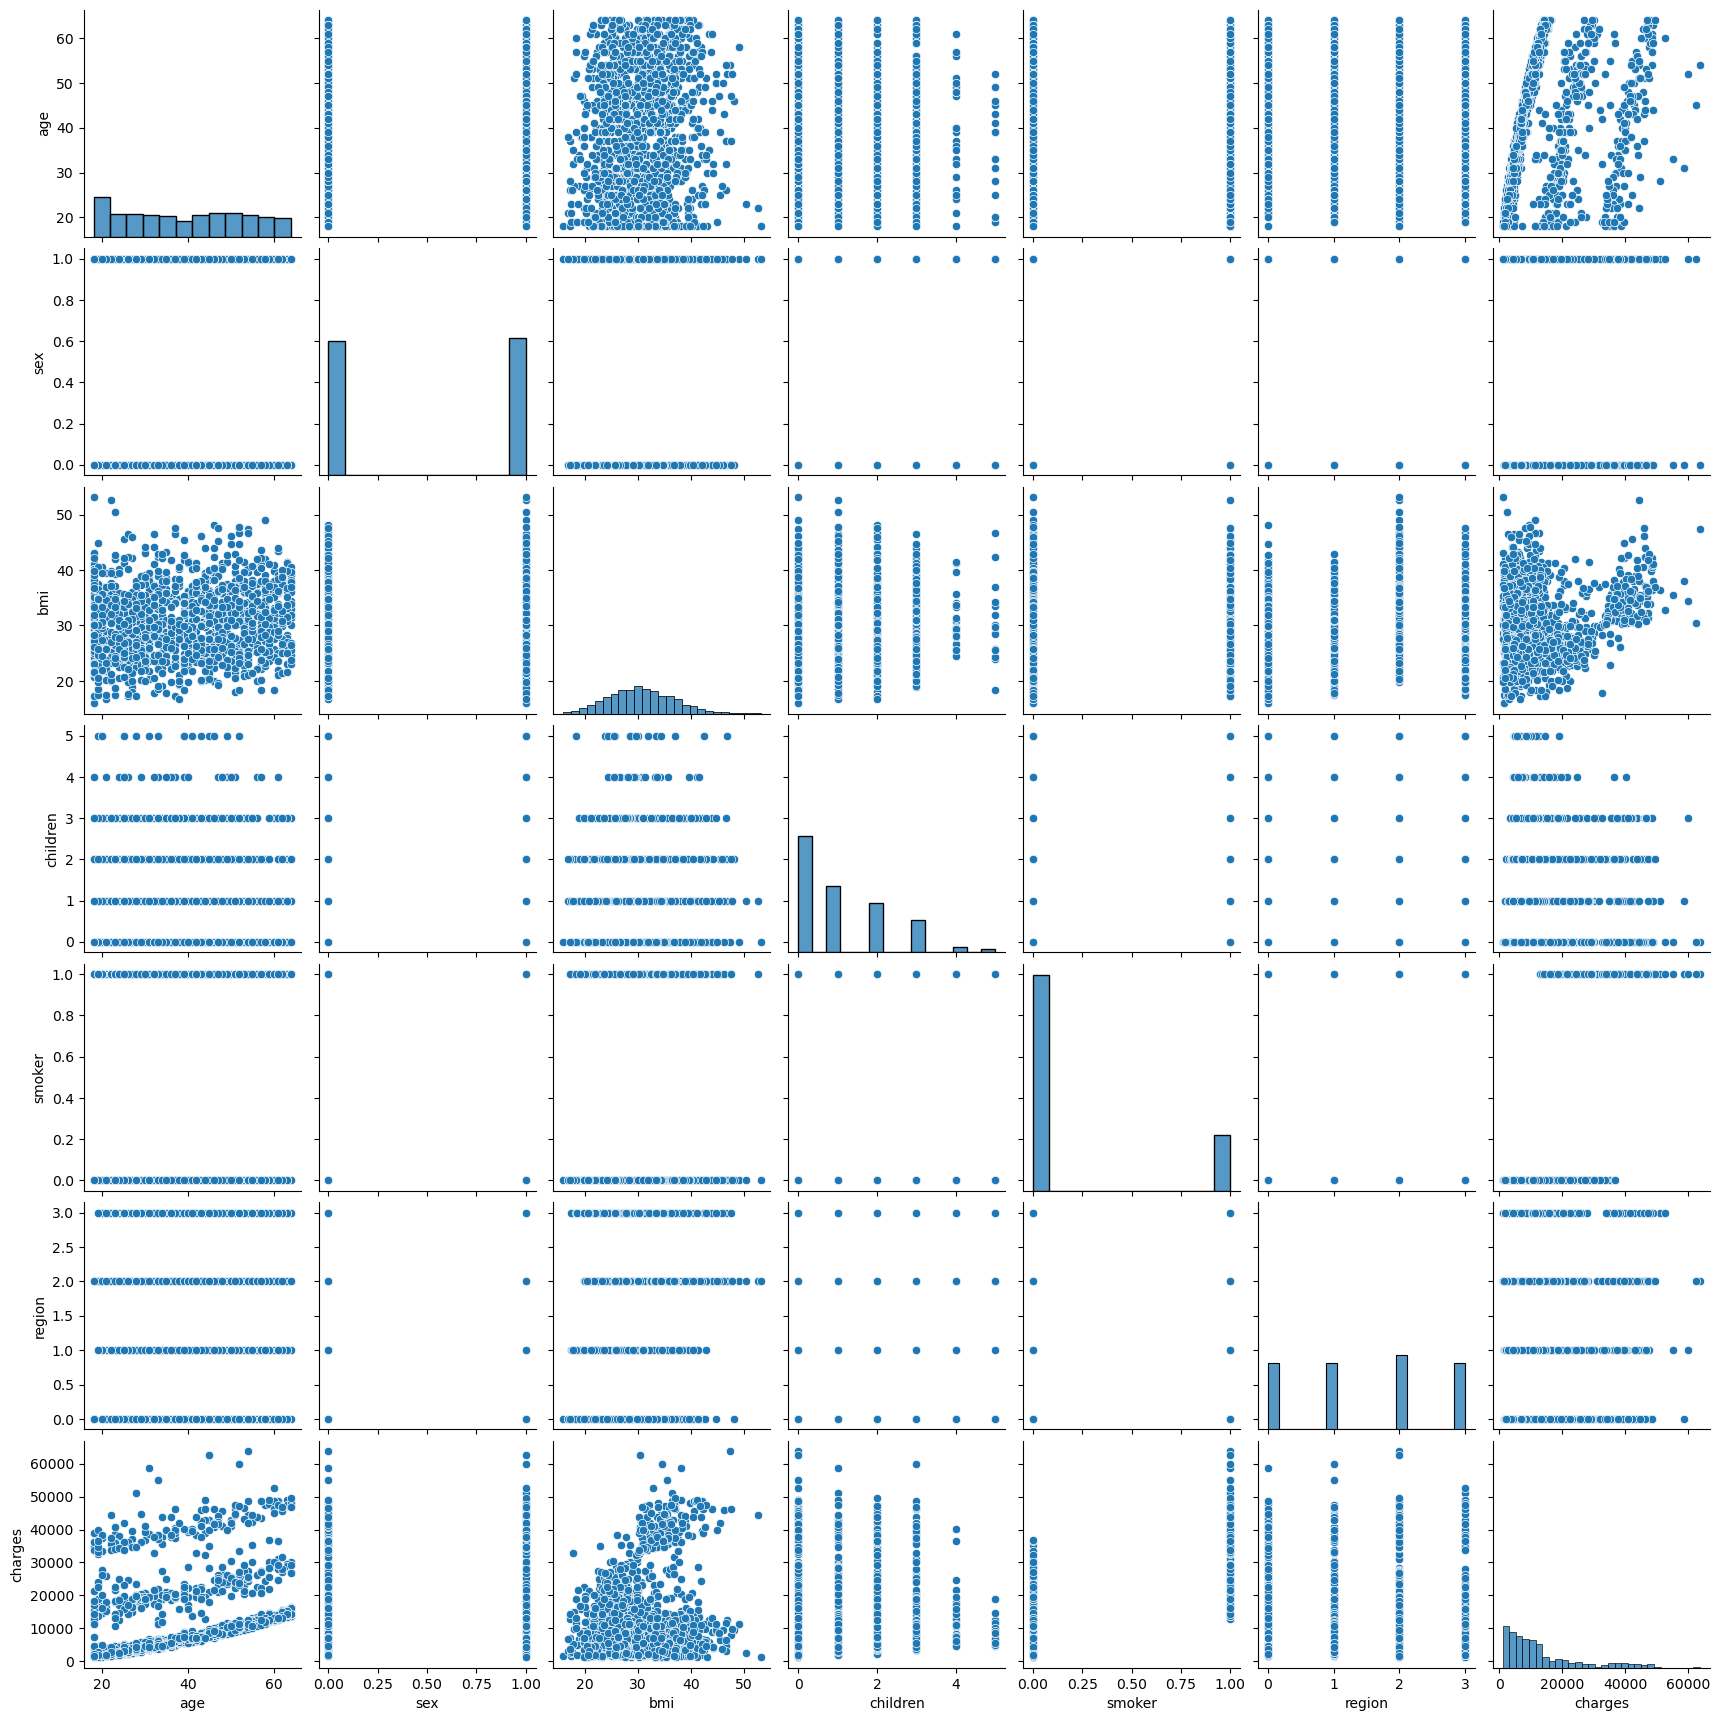

In [171]:
sns.pairplot(df)

# Checking for Outliers

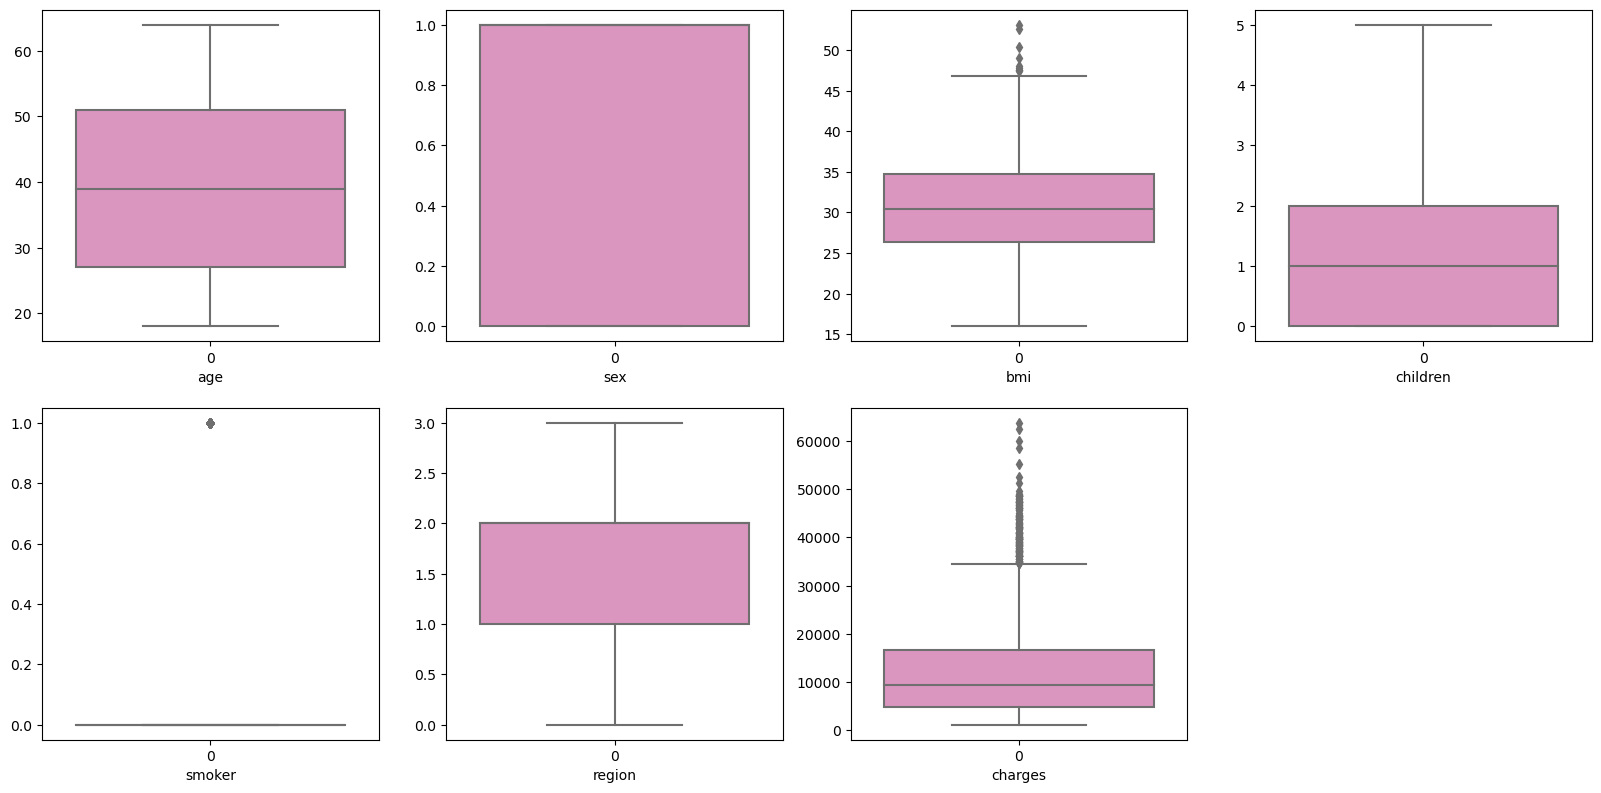

In [172]:
#Checking for Outliers using boxplot
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=7:
        plt.subplot(5,4,p)
        sns.boxplot(df[i],palette = "Set2_r")
        plt.xlabel(i)
    p+=1
plt.show()

found BMI has outliers and charges but charges is target variable so no need to remove

In [174]:
from scipy.stats import zscore

new_df=df.iloc[:,0:6]
z=np.abs(zscore(new_df))
z

age       sex       bmi  children    smoker    region
0     1.438764  1.010519  0.453320  0.908614  1.970587  1.343905
1     1.509965  0.989591  0.509621  0.078767  0.507463  0.438495
2     0.797954  0.989591  0.383307  1.580926  0.507463  0.438495
3     0.441948  0.989591  1.305531  0.908614  0.507463  0.466915
4     0.513149  0.989591  0.292556  0.908614  0.507463  0.466915
...        ...       ...       ...       ...       ...       ...
1333  0.768473  0.989591  0.050297  1.580926  0.507463  0.466915
1334  1.509965  1.010519  0.206139  0.908614  0.507463  1.372326
1335  1.509965  1.010519  1.014878  0.908614  0.507463  0.438495
1336  1.296362  1.010519  0.797813  0.908614  0.507463  1.343905
1337  1.551686  1.010519  0.261388  0.908614  1.970587  0.466915

[1338 rows x 6 columns]

In [193]:
z1=np.abs(zscore(df))
z1

age       sex       bmi  children    smoker    region   charges
0     1.438764  1.010519  0.453320  0.908614  1.970587  1.343905  0.298584
1     1.509965  0.989591  0.509621  0.078767  0.507463  0.438495  0.953689
2     0.797954  0.989591  0.383307  1.580926  0.507463  0.438495  0.728675
3     0.441948  0.989591  1.305531  0.908614  0.507463  0.466915  0.719843
4     0.513149  0.989591  0.292556  0.908614  0.507463  0.466915  0.776802
...        ...       ...       ...       ...       ...       ...       ...
1333  0.768473  0.989591  0.050297  1.580926  0.507463  0.466915  0.220551
1334  1.509965  1.010519  0.206139  0.908614  0.507463  1.372326  0.914002
1335  1.509965  1.010519  1.014878  0.908614  0.507463  0.438495  0.961596
1336  1.296362  1.010519  0.797813  0.908614  0.507463  1.343905  0.930362
1337  1.551686  1.010519  0.261388  0.908614  1.970587  0.466915  1.311053

[1338 rows x 7 columns]

In [175]:
# threshold =3
np.where(z>3)

(array([  32,   71,  116,  166,  413,  425,  438,  568,  640,  847,  877,
         932,  937,  969,  984, 1047, 1085, 1116, 1130, 1245, 1272, 1317],
       dtype=int64),
 array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2],
       dtype=int64))

In [194]:
np.where(z1>3)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
        1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64),
 array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 6, 6, 3, 3, 6, 2], dtype=int64))

In [176]:
df_med=new_df[(z<3).all(axis=1)]

In [195]:
df_charge=df[(z1<3).all(axis=1)]

In [181]:
print("The size of New datset ",df_med.shape[0])

The size of New datset  (1316, 6)


In [183]:
print("The size of old dataset",df.shape[0])

The size of old dataset 1338


loss of data in percentage 

In [184]:
print("Data loss percentage",((df.shape[0]-df_med.shape[0])/df.shape[0])*100)

Data loss percentage 1.6442451420029895


its less than 2 so that drop this rows

In [196]:
df_charge.shape

(1309, 7)

In [187]:
df_med["charges"]=df.iloc[:,-1]

In [189]:
df_med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1316 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1316 non-null   int64  
 1   sex       1316 non-null   int32  
 2   bmi       1316 non-null   float64
 3   children  1316 non-null   int64  
 4   smoker    1316 non-null   int32  
 5   region    1316 non-null   int32  
 6   charges   1316 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 66.8 KB


As we can observe from adding charges from old data set also increase index value to 1337 from new data so creating one more object for correaltion 

# correlation between target variable and independent variables

In [190]:
cor=df_med.corr()
cor

age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.017673  0.119062  0.058319 -0.025751  0.004741  0.299554
sex      -0.017673  1.000000  0.039934  0.015315  0.079468  0.006155  0.059243
bmi       0.119062  0.039934  1.000000  0.027706  0.004988  0.159535  0.203195
children  0.058319  0.015315  0.027706  1.000000  0.025409 -0.004830  0.090870
smoker   -0.025751  0.079468  0.004988  0.025409  1.000000 -0.001462  0.786772
region    0.004741  0.006155  0.159535 -0.004830 -0.001462  1.000000 -0.004410
charges   0.299554  0.059243  0.203195  0.090870  0.786772 -0.004410  1.000000

In [199]:
cor1=df_charge.corr()
cor1

age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.019253  0.118178  0.059100 -0.029090  0.003121  0.305263
sex      -0.019253  1.000000  0.042498  0.014056  0.079058  0.003084  0.059455
bmi       0.118178  0.042498  1.000000  0.029916 -0.005288  0.160126  0.191453
children  0.059100  0.014056  0.029916  1.000000  0.028844 -0.002976  0.100438
smoker   -0.029090  0.079058 -0.005288  0.028844  1.000000 -0.003474  0.785129
region    0.003121  0.003084  0.160126 -0.002976 -0.003474  1.000000 -0.007633
charges   0.305263  0.059455  0.191453  0.100438  0.785129 -0.007633  1.000000

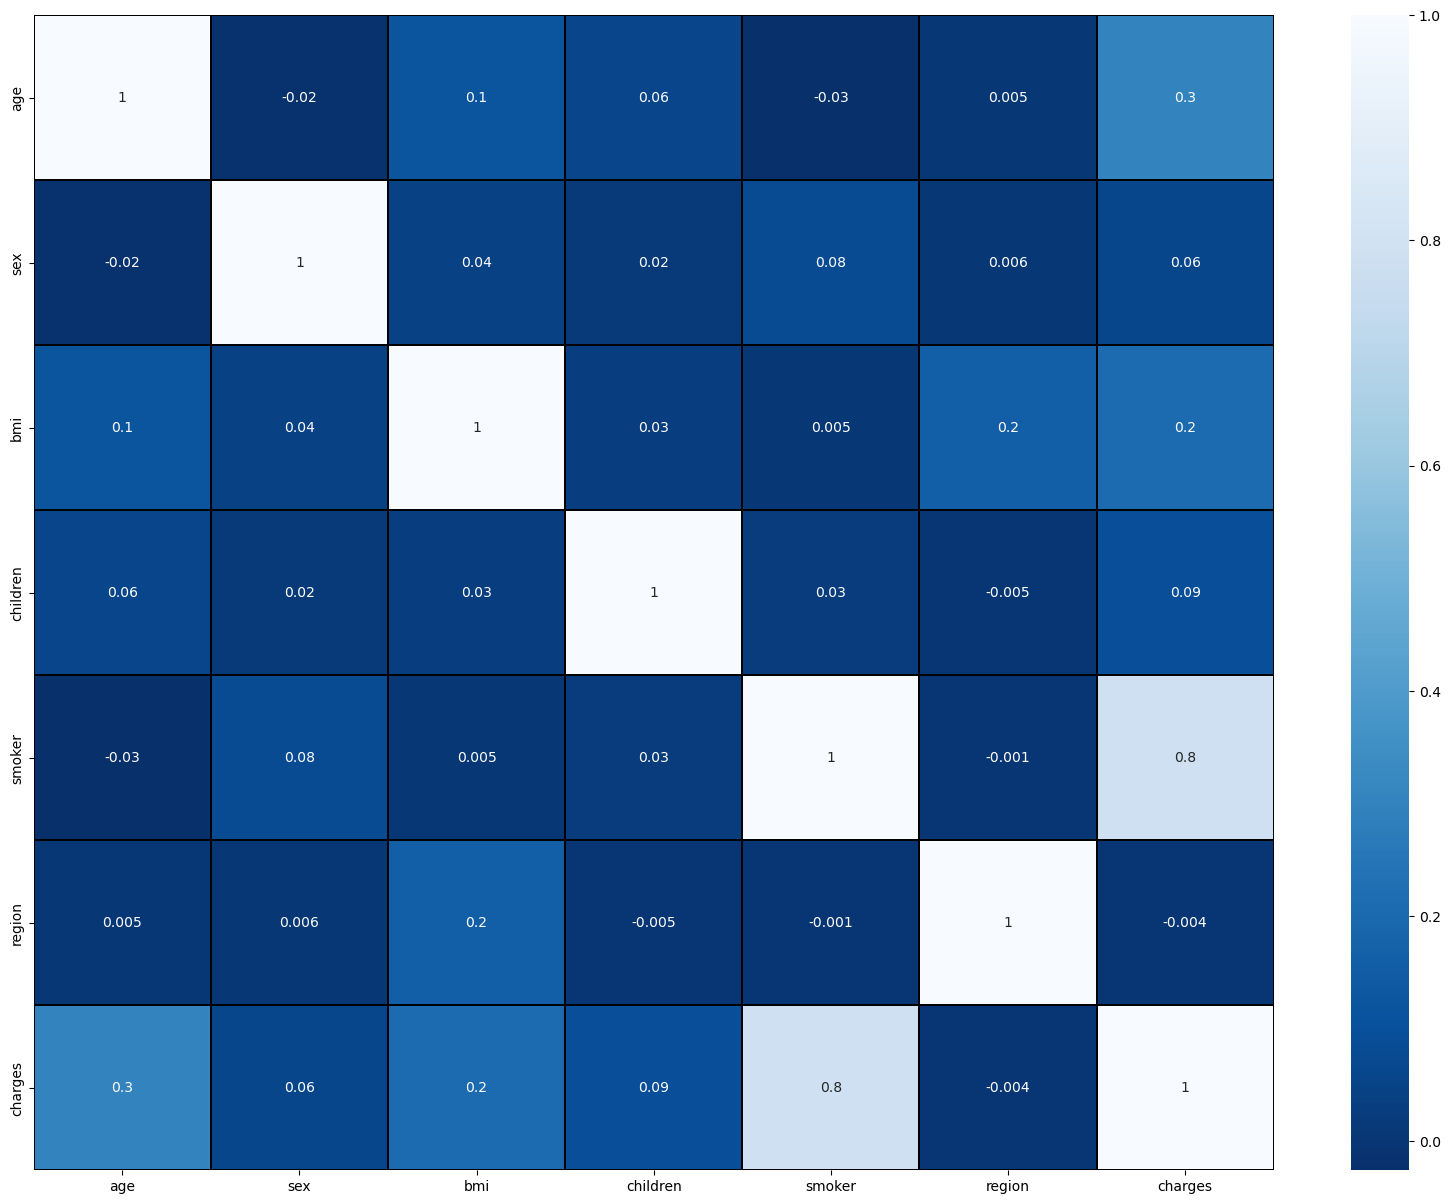

In [200]:
# converting corr table to graphical plot using heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df_med.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Blues_r")
plt.show()

0 - no relation,0.3 to +0.3 less corelation, greater thab -0.5 to +0.5 moderate corelation, greater than -0.7 to +0.7 is high correlation
This heatmap shows the correlation matrix by visualizing the data. we can observe relation b/w feature to feature and feature to label This heatmap contains both negative and positive correlation 

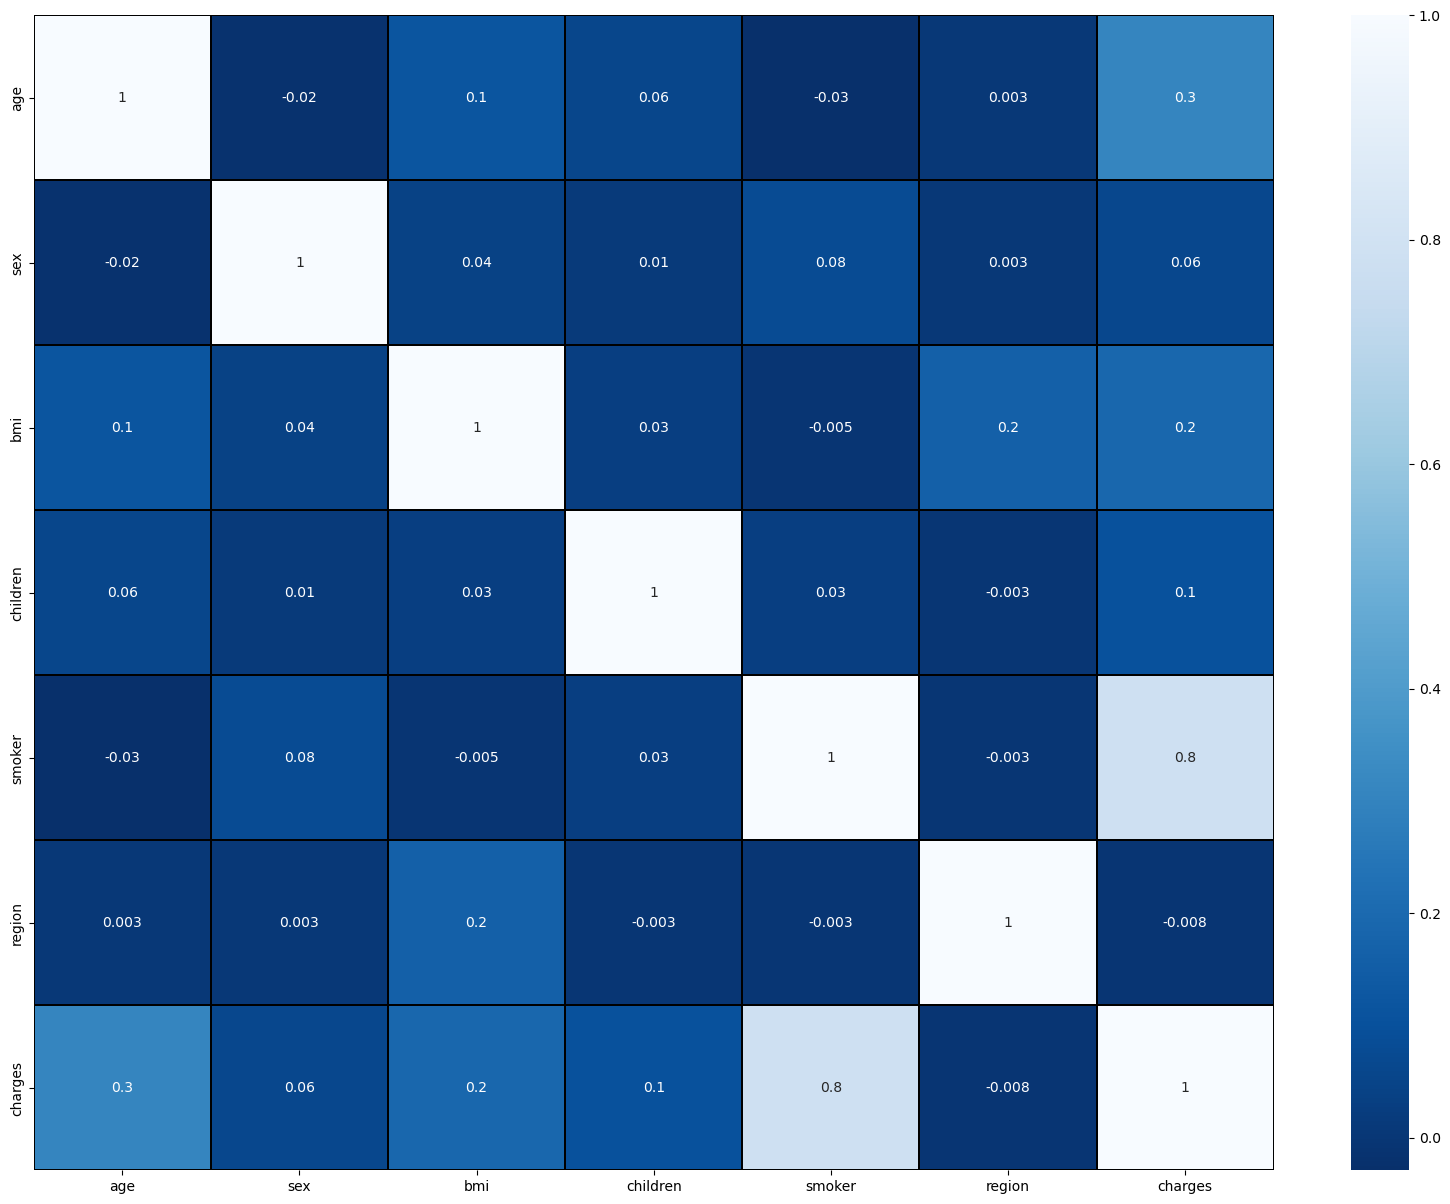

In [201]:
# converting corr table to graphical plot using heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df_charge.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Blues_r")
plt.show()

0 - no relation,0.3 to +0.3 less corelation, greater thab -0.5 to +0.5 moderate corelation, greater than -0.7 to +0.7 is high correlation This heatmap shows the correlation matrix by visualizing the data. we can observe relation b/w feature to feature and feature to label This heatmap contains both negative and positive correlation

In [202]:
cor1['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.785129
age         0.305263
bmi         0.191453
children    0.100438
sex         0.059455
region     -0.007633
Name: charges, dtype: float64

# Visualizing the correlation between label and features using bar plot

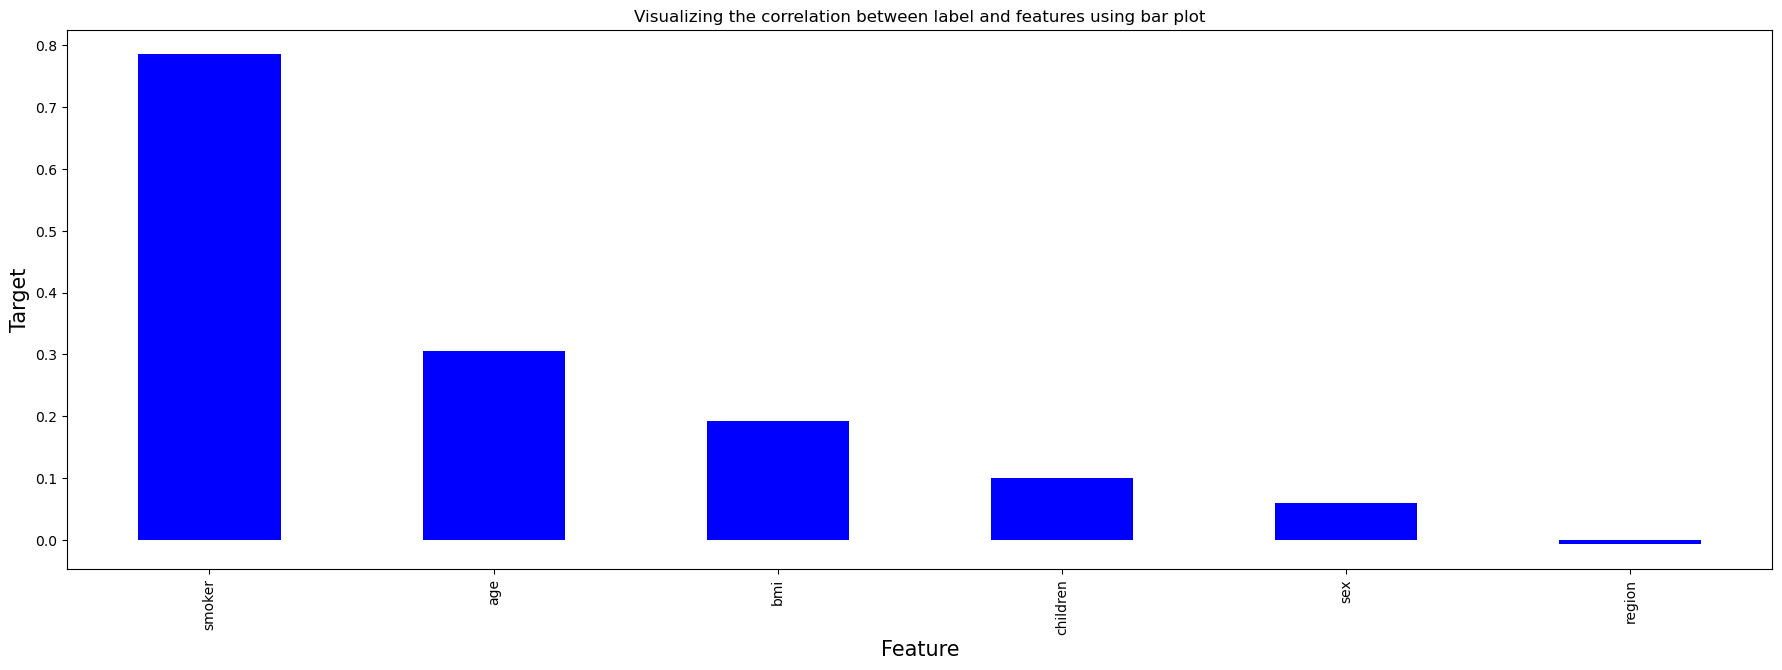

In [203]:
#Visualizing the correlation between label and features using bar plot

plt.figure(figsize=(22,7))
df_charge.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Visualizing the correlation between label and features using bar plot')
plt.show()

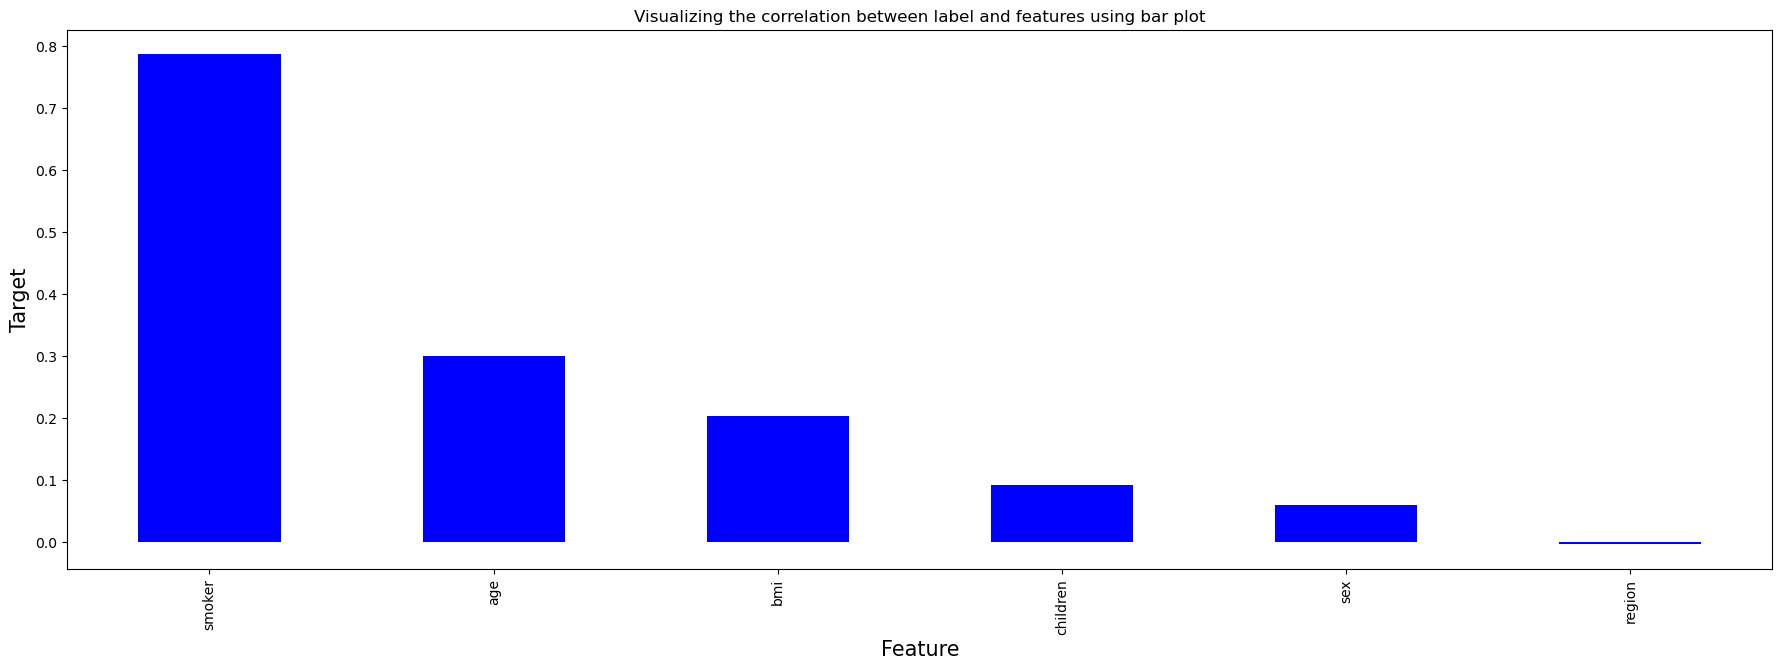

In [204]:
#Visualizing the correlation between label and features using bar plot

plt.figure(figsize=(22,7))
df_med.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Visualizing the correlation between label and features using bar plot')
plt.show()

smoker has highest impact after age bmi

In [208]:
# Separating features and label

x=df_med.iloc[:,:-1]
y=df_med.iloc[:,-1]

In [209]:
# Separating features and label
x1=df_charge.iloc[:,:-1]
y1=df_charge.iloc[:,-1]

creating two x,x1 and y and y1 for dataset for better analysis and finding better dataset for good performance of model with high variance and low biasness

# Feature Scaling using Standard Scalarization

In [210]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
x=pd.DataFrame(SS.fit_transform(x),columns=x.columns)
x

age       sex       bmi  children    smoker    region
0    -1.441444 -1.006098 -0.453768 -0.928234  1.959141  1.352089
1    -1.512509  0.993939  0.527239 -0.038536 -0.510428  0.446568
2    -0.801858  0.993939  0.398555  1.740862 -0.510428  0.446568
3    -0.446533  0.993939 -1.321967 -0.928234 -0.510428 -0.458954
4    -0.517598  0.993939 -0.289988 -0.928234 -0.510428 -0.458954
...        ...       ...       ...       ...       ...       ...
1311  0.761574  0.993939  0.059297  1.740862 -0.510428 -0.458954
1312 -1.512509 -1.006098  0.218063 -0.928234 -0.510428 -1.364475
1313 -1.512509 -1.006098  1.041975 -0.928234 -0.510428  0.446568
1314 -1.299314 -1.006098 -0.804724 -0.928234 -0.510428  1.352089
1315  1.543290 -1.006098 -0.258235 -0.928234  1.959141 -0.458954

[1316 rows x 6 columns]

In [211]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
x1=pd.DataFrame(SS.fit_transform(x1),columns=x1.columns)
x1

age       sex       bmi  children    smoker    region
0    -1.439063 -1.005362 -0.449359 -0.929616  1.984848  1.352753
1    -1.510086  0.994667  0.533391 -0.040093 -0.503817  0.447460
2    -0.799859  0.994667  0.404478  1.738954 -0.503817  0.447460
3    -0.444746  0.994667 -1.319101 -0.929616 -0.503817 -0.457833
4    -0.515769  0.994667 -0.285288 -0.929616 -0.503817 -0.457833
...        ...       ...       ...       ...       ...       ...
1304  0.762639  0.994667  0.064617  1.738954 -0.503817 -0.457833
1305 -1.510086 -1.005362  0.223666 -0.929616 -0.503817 -1.363127
1306 -1.510086 -1.005362  1.049041 -0.929616 -0.503817  0.447460
1307 -1.297018 -1.005362 -0.800939 -0.929616 -0.503817  1.352753
1308  1.543888 -1.005362 -0.253479 -0.929616  1.984848 -0.457833

[1309 rows x 6 columns]

# Checking Variance Inflation Factor(VIF)

In [212]:
# Finding variance inflation factor in each scaled column

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

VIF values  Features
0    1.018969       age
1    1.008550       sex
2    1.043397       bmi
3    1.004829  children
4    1.007649    smoker
5    1.026415    region

In [213]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif1=pd.DataFrame()
vif1["VIF values"]=[variance_inflation_factor(x1.values, i) for i in range(len(x1.columns))]
vif1["Features"]=x1.columns

vif1

VIF values  Features
0    1.019082       age
1    1.008815       sex
2    1.043841       bmi
3    1.005176  children
4    1.007983    smoker
5    1.026656    region

cannot drop any column as has only limited variable for model

# Modelling

In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2,random_state= i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predLR=LR.predict(x_test)
    acc=r2_score(y_test,predLR)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu,"at random_state", maxRS)

Best accuracy is  0.813410344468109 at random_state 109


In [215]:
print("Mean absolute error",mean_absolute_error(y_test,predLR))
print("Mean squared error",mean_squared_error(y_test,predLR))

print("Root mean squared error",np.sqrt(mean_squared_error(y_test,predLR)))

Mean absolute error 4242.699061317165
Mean squared error 42071207.659437664
Root mean squared error 6486.232162005741


In [219]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=109)

In [224]:
maxAccu1 = 0
maxRS1 = 0
for p in range(1,200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size = 0.2,random_state= p)
    LR=LinearRegression()
    LR.fit(x1_train,y1_train)
    predLR1=LR.predict(x1_test)
    acc1=r2_score(y1_test,predLR1)
    if acc1>maxAccu1:
        maxAccu1=acc1
        maxRS1=p
print("Best accuracy is ", maxAccu,"at random_state", maxRS1)

Best accuracy is  0.813410344468109 at random_state 72


In [225]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size = 0.3,random_state= 72)

# Regresion Algorithms

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



# Decision Tree Regression
DT= DecisionTreeRegressor()
DT.fit(x_train, y_train)
predDT = DT.predict(x_test)
print(r2_score(y_test,predDT))


# Decision Tree Regression for other dataset w/o outliers in charge 
DT1= DecisionTreeRegressor()
DT1.fit(x1_train, y1_train)
predDT1 = DT.predict(x1_test)
print(r2_score(y1_test,predDT1))




0.7245086907433422
0.9032192697239315


In [230]:
#Checking for random forest regressor
RFR= RandomForestRegressor()
RFR.fit(x_train, y_train)
predRFR =RFR.predict(x_test)
mse= mean_squared_error(y_test, predRFR)
print("Random Forest Regression Mean Squared Error:", mse)
print(r2_score(y_test,predRFR))

# random forest regressor for other dataset w/o outliers in charge 
RFR1= RandomForestRegressor()
RFR1.fit(x1_train, y1_train)
predRFR1 =RFR1.predict(x1_test)
mse= mean_squared_error(y1_test, predRFR1)
print("Random Forest Regression Mean Squared Error:", mse)
print(r2_score(y1_test,predRFR1))

Random Forest Regression Mean Squared Error: 20164708.487829637
0.8744371156268941
Random Forest Regression Mean Squared Error: 18873007.021432992
0.8632738675262301


In [232]:
#checking KNN regressor

from sklearn.neighbors import KNeighborsRegressor

k = 5 
KNN = KNeighborsRegressor(n_neighbors=k)
KNN.fit(x_train, y_train)
predKNN=KNN.predict(x_test)
mse= mean_squared_error(y_test, predKNN)
print("k-nearest neighbor:", mse)
print(r2_score(y_test,predKNN))

#checking KNN regressor for other dataset w/o outliers in charge 
k = 5 
KNN1 = KNeighborsRegressor(n_neighbors=k)
KNN1.fit(x1_train, y1_train)
predKNN1=KNN1.predict(x1_test)
mse= mean_squared_error(y1_test, predKNN1)
print("k-nearest neighbor:", mse)
print(r2_score(y1_test,predKNN1))


k-nearest neighbor: 22839213.782520004
0.8577833366111871
k-nearest neighbor: 23800980.56915949
0.8275729978477253


In [233]:
#Checking Support vector regressor

from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
predsvr=svr.predict(x_test)
mse= mean_squared_error(y_test, predsvr)
print("SVR  Mean Squared Error:", mse)
print(r2_score(y_test,predsvr))

#Checking Support vector regressor for other dataset w/o outliers in charge 
svr1 = SVR()
svr1.fit(x1_train,y1_train)
predsvr1=svr1.predict(x1_test)
mse= mean_squared_error(y1_test, predsvr1)
print("SVR  Mean Squared Error:", mse)
print(r2_score(y1_test,predsvr1))

SVR  Mean Squared Error: 178696120.2858357
-0.11271632331879089
SVR  Mean Squared Error: 150101637.5634817
-0.0874163485833388


In [234]:
#Checking for GBR

from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
predGB= GB.predict(x_test)
print(mean_squared_error(y_test,predGB))
print(r2_score(y_test,predGB))

#Checking for GBR for other dataset w/o outliers in charge
GB1 = GradientBoostingRegressor()
GB1.fit(x1_train,y1_train)
predGB1= GB1.predict(x1_test)
print(mean_squared_error(y1_test,predGB1))
print(r2_score(y1_test,predGB1))


16604272.264105616
0.8966074654808034
15249612.034390768
0.8895236740589421


In [235]:
#Checking accuracy for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)
predABR= ABR.predict(x_test)
print(mean_squared_error(y_test,predABR))
print(r2_score(y_test,predABR))

#Checking accuracy for AdaBoostRegressor for other dataset w/o outliers in charge
ABR1=AdaBoostRegressor()
ABR1.fit(x1_train,y1_train)
predABR1= ABR1.predict(x1_test)
print(mean_squared_error(y1_test,predABR1))
print(r2_score(y1_test,predABR1))


22302005.125536583
0.8611284615120381
22812554.309371755
0.8347336850441438


In [236]:
#Checking accuracy for BaggingRegressor
from sklearn.ensemble import BaggingRegressor
BC=BaggingRegressor()
BC.fit(x_train,y_train)
predBC= BC.predict(x_test)
print(mean_squared_error(y_test,predBC))
print(r2_score(y_test,predBC))

#Checking accuracy for BaggingRegressor for other dataset w/o outliers in charge
BC1=BaggingRegressor()
BC1.fit(x1_train,y1_train)
predBC1= BC1.predict(x1_test)
print(mean_squared_error(y1_test,predBC1))
print(r2_score(y1_test,predBC1))

23060481.44066701
0.8564055331387397
21561859.41497689
0.8437943861619414


In [239]:
#Checking accuracy for ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
ET=ExtraTreesRegressor()
ET.fit(x_train,y_train)
predET= ET.predict(x_test)
print(mean_squared_error(y_test,predET))
print(r2_score(y_test,predET))

#Checking accuracy for ExtraTreesRegressor for other dataset w/o outliers in charge
ET1=ExtraTreesRegressor()
ET1.fit(x1_train,y1_train)
predET1= ET1.predict(x1_test)
print(mean_squared_error(y1_test,predET1))
print(r2_score(y1_test,predET1))


22749377.74233596
0.8583427333578832
23329950.42287325
0.8309853915435012


As checked with all the model best result shown by Decision tree regressor with 90.32

# Spliting train test data using Cross validation score

In [240]:
from sklearn.model_selection import cross_val_score

In [243]:
#Checking cv score for random forest regressor
score=cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and Cross validation score is :",r2_score(y_test,predRFR)-score.mean())

#Checking cv score for random forest regressor for other dataset w/o outliers in charge
score1=cross_val_score(RFR1,x1,y1)
print(score1)
print(score1.mean())
print("Difference between Accuracy score and Cross validation score is :",r2_score(y1_test,predRFR1)-score1.mean())

[0.85539969 0.77867001 0.86211363 0.82631516 0.85599169]
0.8356980351582364
Difference between Accuracy score and Cross validation score is : 0.038739080468657705
[0.85435994 0.78229099 0.85676321 0.8340788  0.85420289]
0.8363391695377949
Difference between Accuracy score and Cross validation score is : 0.026934697988435286


In [246]:
#Checking cv score for Decision tree regressor
score=cross_val_score(DT,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and Cross validation score is :",r2_score(y_test,predDT)-score.mean())

#Checking cv score for random forest regressor for other dataset w/o outliers in charge
score1=cross_val_score(DT1,x1,y1)
print(score1)
print(score1.mean())
print("Difference between Accuracy score and Cross validation score is :",r2_score(y1_test,predDT1)-score1.mean())

[0.77022274 0.70109023 0.66344181 0.7146368  0.68415631]
0.706709577779612
Difference between Accuracy score and Cross validation score is : 0.017799112963730268
[0.78170223 0.65139242 0.62446634 0.73403106 0.6389931 ]
0.6861170310756692
Difference between Accuracy score and Cross validation score is : 0.21710223864826228


In [247]:
#checking  CV for KNN regressor
score=cross_val_score(KNN,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and Cross validation score is :",r2_score(y_test,predKNN)-score.mean())


#checking  CV for KNN regressor for other dataset w/o outliers in charge
score1=cross_val_score(KNN1,x1,y1)
print(score1)
print(score1.mean())
print("Difference between Accuracy score and Cross validation score is :",r2_score(y1_test,predKNN1)-score1.mean())

[0.82139209 0.75698491 0.83949648 0.8033858  0.81280207]
0.806812269270978
Difference between Accuracy score and Cross validation score is : 0.050971067340209064
[0.83079348 0.7715433  0.82598029 0.79640205 0.82468182]
0.8098801911996685
Difference between Accuracy score and Cross validation score is : 0.017692806648056836


In [248]:
#checking  CV for GBR
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and Cross validation score is :",r2_score(y_test,predGB)-score.mean())

#checking  CV for GBR  for other dataset w/o outliers in charge
score1=cross_val_score(GB1,x1,y1)
print(score1)
print(score1.mean())
print("Difference between Accuracy score and Cross validation score is :",r2_score(y1_test,predGB1)-score1.mean())


[0.87164233 0.79881901 0.88772168 0.84527707 0.86172558]
0.8530371329169213
Difference between Accuracy score and Cross validation score is : 0.0435703325638821
[0.87801961 0.80530169 0.88385392 0.84541501 0.8638385 ]
0.8552857451898724
Difference between Accuracy score and Cross validation score is : 0.03423792886906962


In [249]:
#Checking CV  for AdaBoostRegressor
score=cross_val_score(ABR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and Cross validation score is :",r2_score(y_test,predABR)-score.mean())

#Checking CV  for AdaBoostRegressor  for other dataset w/o outliers in charge
score1=cross_val_score(ABR1,x1,y1)
print(score1)
print(score1.mean())
print("Difference between Accuracy score and Cross validation score is :",r2_score(y1_test,predABR1)-score1.mean())


[0.83890643 0.78955463 0.82614073 0.79504928 0.83728136]
0.8173864841105061
Difference between Accuracy score and Cross validation score is : 0.04374197740153207
[0.83242534 0.79274907 0.84312673 0.80982542 0.83220699]
0.8220667102444214
Difference between Accuracy score and Cross validation score is : 0.012666974799722452


# Hyper Parameter Tuning

In [250]:
from sklearn.model_selection import GridSearchCV

In [255]:
parameters = {"criterion" :["squared_error", "friedman_mse", "absolute_error", "poisson"],
              "splitter" :["best", "random"],
              "max_depth" : [None,10,20],
              "ccp_alpha" :[0.0,0.01,0.001],
              "random_state" : [10,50,1000]}             

In [256]:
GCV= GridSearchCV(DecisionTreeRegressor(),parameters, cv = 5)

In [257]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.001],
                         'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [None, 10, 20],
                         'random_state': [10, 50, 1000],
                         'splitter': ['best', 'random']})

In [258]:
GCV.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'absolute_error',
 'max_depth': 10,
 'random_state': 1000,
 'splitter': 'random'}

In [262]:
# Decision Tree Regression
DT= DecisionTreeRegressor(ccp_alpha = 0.001,criterion ="absolute_error",max_depth=10,random_state=1000,splitter="random")
DT.fit(x_train, y_train)
predDT = DT.predict(x_test)
print(r2_score(y_test,predDT))


# Decision Tree Regression for other dataset w/o outliers in charge 
DT1= DecisionTreeRegressor(ccp_alpha = 0.001,criterion ="absolute_error",max_depth=10,random_state=1000,splitter="random")
DT1.fit(x1_train, y1_train)
predDT1 = DT1.predict(x1_test)
print(r2_score(y1_test,predDT1))



0.7600817560875779
0.7736096973561155


In [260]:
# Decision Tree Regression
DT= DecisionTreeRegressor(ccp_alpha = 0.01,criterion ="absolute_error",max_depth=10,random_state=100,splitter="best")
DT.fit(x_train, y_train)
predDT = DT.predict(x_test)
print(r2_score(y_test,predDT))


# Decision Tree Regression for other dataset w/o outliers in charge 
DT1= DecisionTreeRegressor(ccp_alpha = 0.01,criterion ="absolute_error",max_depth=10,random_state=100,splitter="best")
DT1.fit(x1_train, y1_train)
predDT1 = DT1.predict(x1_test)
print(r2_score(y1_test,predDT1))


0.7619072222870222
0.7437417412920335


As the result show the best parameter with GridSearchCV

# Saving the model

In [263]:
#Saving the model using .pkl

import joblib
joblib.dump(DT1,"Medical_cost_personal_insurance.pkl")
            

['Medical_cost_personal_insurance.pkl']

# Predicting the saved model

In [267]:
#lets load the saved model and get the predictions

model=joblib.load("Medical_cost_personal_insurance.pkl")

In [268]:
#Prediction
prediction=model.predict(x1_test)
prediction

array([ 5247.177175, 17468.9839  ,  7441.501   , 14692.66935 ,
        8988.15875 , 36985.6826  , 28340.18885 , 18838.70366 ,
       10891.866025,  6551.7501  ,  7144.86265 , 12227.25595 ,
        2103.18905 ,  4399.731   , 20773.62775 ,  9290.1395  ,
        1632.30035 ,  3569.94395 , 39241.442   ,  8283.777525,
        6389.37785 , 14319.031   , 12487.4999  ,  6810.522825,
       11554.2236  ,  6810.522825,  6529.1022  , 38511.6283  ,
        5989.52365 ,  9858.0782  , 48824.45    ,  1712.227   ,
       17043.3414  , 13662.5514  ,  9858.0782  ,  8554.127   ,
       21659.9301  ,  7441.501   , 41919.097   , 42111.6647  ,
        6529.1022  ,  3376.034425, 10436.096   ,  1719.4363  ,
        2322.6218  ,  6571.544   ,  1632.30035 ,  4462.7218  ,
       12648.7034  ,  4673.3922  ,  2853.06065 ,  2743.466575,
       12284.2335  ,  7590.1309  ,  1634.5734  , 10436.096   ,
       18608.262   ,  1632.30035 , 12284.2335  , 11299.343   ,
       45702.02235 ,  7626.993   , 33475.81715 ,  1634.

In [269]:
a=np.array(y1_test)
df=pd.DataFrame()
df["Predicted"] = prediction
df["Observed"] =a

df

Predicted     Observed
0     5247.177175   5267.81815
1    17468.983900  17560.37975
2     7441.501000   8410.04685
3    14692.669350  16455.70785
4     8988.158750   8835.26495
..            ...          ...
388  45008.955500  46889.26120
389   2205.980800   2211.13075
390   4040.558250  20277.80751
391  12648.703400  12146.97100
392   2103.189050   2254.79670

[393 rows x 2 columns]